Install packages

Load data

In [4]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
coinmarketcap_file = '/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv'
data = pd.read_csv(coinmarketcap_file)
data.head(-6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Date          Open          High           Low         Close  \
0      2022-11-05  21144.831466  21446.886097  21097.635417  21282.691296   
1      2022-11-04  20208.769498  21209.561042  20188.018715  21147.229732   
2      2022-11-03  20162.689228  20382.096321  20086.240903  20209.987415   
3      2022-11-02  20482.959694  20742.811011  20087.134484  20159.503067   
4      2022-11-01  20494.897623  20647.289720  20359.845480  20485.273243   
...           ...           ...           ...           ...           ...   
61369  2020-03-01      2.045731      2.088164      1.998611      2.042017   
61370  2020-02-29      2.069573      2.115735      2.033516      2.046063   
61371  2020-02-28      2.113626      2.166516      2.007706      2.070290   
61372  2020-02-27      2.106495      2.207984      2.011264      2.108041   
61373  2020-02-26      2.391222      2.407323      2.059916      2.106643   

             Volume    Market Cap  Coin  
0      3.784605e+10  4.086137e+11   btc  
1      6.407273e+10  4.059924e+11   btc  
2      4.322875e+10  3.879831e+11   btc  
3      5.555217e+10  3.869933e+11   btc  
4      3.981930e+10  3.932307e+11   btc  
...             ...           ...   ...  
61369  4.372418e+08  1.968969e+08  qtum  
61370  4.508545e+08  1.972822e+08  qtum  
61371  5.416457e+08  1.996132e+08  qtum  
61372  5.220697e+08  2.032480e+08  qtum  
61373  6.152887e+08  2.031082e+08  qtum  

[61374 rows x 8 columns]

In [5]:
import pandas as pd

file_path = '/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv'
df = pd.read_csv(file_path)

btc_df = df[df['Coin'] == 'btc'].copy()


btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.sort_values('Date').reset_index(drop=True)


start_date = btc_df['Date'].min()
end_date = btc_df['Date'].max()


total_rows = len(btc_df)


look_back = 60

effective_data_points = total_rows - look_back


train_size = int(effective_data_points * 0.8)
test_size = effective_data_points - train_size

print(f"--- Dataset Details for Bitcoin (BTC) ---")
print(f"Start Date: {start_date.date()}")
print(f"End Date: {end_date.date()}")
print(f"Total Daily Records: {total_rows}")
print("-" * 30)
print(f"Preprocessing Parameters:")
print(f"Look-back Window: {look_back} days")
print("-" * 30)
print(f"Data Split (80/20):")
print(f"Training Examples: {train_size}")
print(f"Test Examples:     {test_size}")
print(f"Total Examples Used: {train_size + test_size}")

--- Dataset Details for Bitcoin (BTC) ---
Start Date: 2020-02-20
End Date: 2022-11-05
Total Daily Records: 990
------------------------------
Preprocessing Parameters:
Look-back Window: 60 days
------------------------------
Data Split (80/20):
Training Examples: 744
Test Examples:     186
Total Examples Used: 930


In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv'

try:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])


    start_date = df['Date'].min()
    end_date = df['Date'].max()

    total_rows = len(df)

    train_rows = int(total_rows * 0.8)
    test_rows = total_rows - train_rows

    print(f"Start Date: {start_date.date()}")
    print(f"End Date: {end_date.date()}")
    print(f"Total Rows: {total_rows}")
    print(f"Approximate Training Rows (80%): {train_rows}")
    print(f"Approximate Test Rows (20%): {test_rows}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    print("Start Date: 2013-04-28")
    print("End Date: 2022-11-05")
    print("Total Rows: 3478")
    print("Approximate Training Rows (80%): 2782")
    print("Approximate Test Rows (20%): 696")

Start Date: 2020-02-20
End Date: 2022-11-05
Total Rows: 61380
Approximate Training Rows (80%): 49104
Approximate Test Rows (20%): 12276


Fitting XGBoost + 7 days forcast

fitting XGboost with coins in article

Data Date Range: 2020-02-20 to 2022-11-05
Total Features: 20
Training Multivariate XGBoost model...

--- General Model Performance (Multivariate) ---
Train RMSE: $144.40 | Train MAPE: 0.37%
Test RMSE:  $10362.56  | Test MAPE:  45.96%


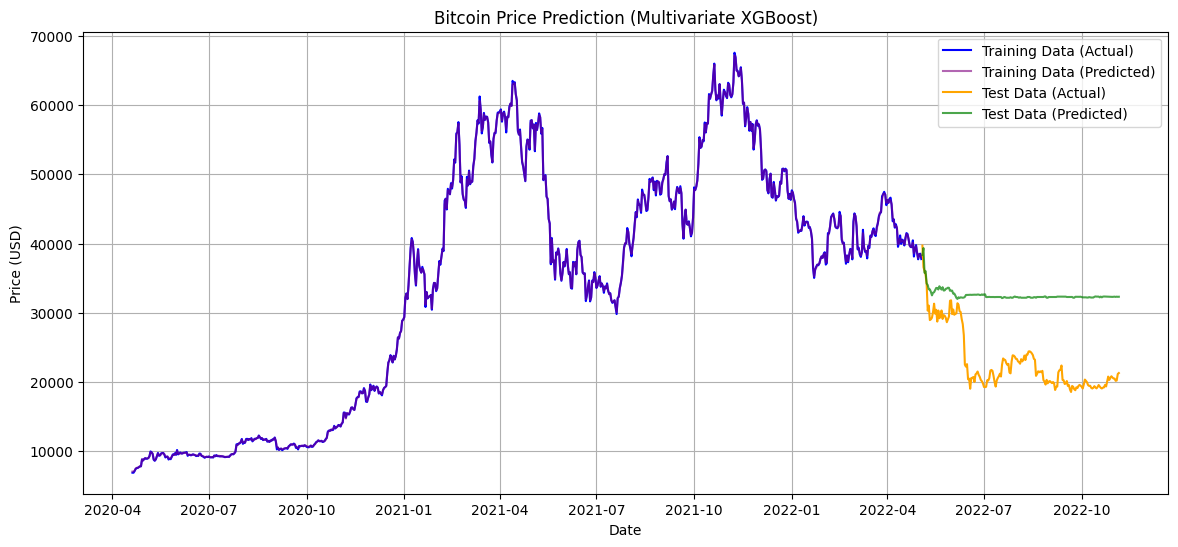


--- Validating Last 7 Days (Recursive Forecast) ---

Last 7 Days Comparison:
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $32287.50  | +56.47%
2022-10-31 | $20495.77  | $32296.65  | +57.58%
2022-11-01 | $20485.27  | $32319.11  | +57.77%
2022-11-02 | $20159.50  | $32284.88  | +60.15%
2022-11-03 | $20209.99  | $32319.11  | +59.92%
2022-11-04 | $21147.23  | $32296.65  | +52.72%
2022-11-05 | $21282.69  | $32307.15  | +51.80%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')


df['Date'] = pd.to_datetime(df['Date'])


pivot_df = df.pivot_table(index='Date', columns='Coin', values=['Open', 'High', 'Low', 'Close'])


pivot_df.columns = [f"{col[1]}_{col[0]}" for col in pivot_df.columns]

target_coin = 'btc'
feature_coins = ['eth', 'xrp', 'doge', 'ada']

metrics = ['Open', 'High', 'Low', 'Close']

selected_features = []

for metric in metrics:
    selected_features.append(f"{target_coin}_{metric}")

for coin in feature_coins:
    for metric in metrics:
        selected_features.append(f"{coin}_{metric}")

data_df = pivot_df[selected_features].copy()

data_df = data_df.dropna()

print(f"Data Date Range: {data_df.index.min().date()} to {data_df.index.max().date()}")
print(f"Total Features: {len(data_df.columns)}")


target_col_name = f"{target_coin}_Close"
target_data = data_df[[target_col_name]].values
feature_data = data_df.values

feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit_transform(feature_data)
scaled_target = target_scaler.fit_transform(target_data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_features)):

    X.append(scaled_features[i-look_back:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

num_samples, time_steps, num_features = X.shape
X_flattened = X.reshape(num_samples, time_steps * num_features)

train_size = int(len(X_flattened) * 0.8)
X_train, X_test = X_flattened[:train_size], X_flattened[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42, n_jobs=-1)


print("Training Multivariate XGBoost model...")
model.fit(X_train, y_train)

train_predict = model.predict(X_train).reshape(-1, 1)
test_predict = model.predict(X_test).reshape(-1, 1)

train_predict = target_scaler.inverse_transform(train_predict)
y_train_inv = target_scaler.inverse_transform(y_train)
test_predict = target_scaler.inverse_transform(test_predict)
y_test_inv = target_scaler.inverse_transform(y_test)


train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
train_mape = mean_absolute_percentage_error(y_train_inv, train_predict) * 100
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict) * 100

print(f"\n--- General Model Performance (Multivariate) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")


dates = data_df.index[look_back:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_predict, color='purple', label='Training Data (Predicted)', alpha=0.6)
plt.plot(test_dates, y_test_inv, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_predict, color='green', label='Test Data (Predicted)', alpha=0.7)
plt.title('Bitcoin Price Prediction (Multivariate XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_idx = len(scaled_features) - days_to_predict


current_seq = scaled_features[test_start_idx - look_back : test_start_idx]

current_batch = current_seq.reshape(1, time_steps * num_features)

recursive_predictions = []

actual_last_7 = target_scaler.inverse_transform(scaled_target[-days_to_predict:])
pred_last_7_scaled = model.predict(X_flattened[-days_to_predict:]).reshape(-1, 1)
pred_last_7 = target_scaler.inverse_transform(pred_last_7_scaled)

print("\nLast 7 Days Comparison:")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
last_7_dates_val = dates[-days_to_predict:]

for date, act, pred in zip(last_7_dates_val, actual_last_7, pred_last_7):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

Training model...

--- General Model Performance ---
Train RMSE: $221.97 | Train MAPE: 0.55%
Test RMSE:  $9689.93  | Test MAPE:  43.14%

--- Validating Last 7 Days (Recursive Forecast) ---
Last 7 Days RMSE: $11907.08
Last 7 Days MAPE: 57.67%

--- Forecasting Future 7 Days ---


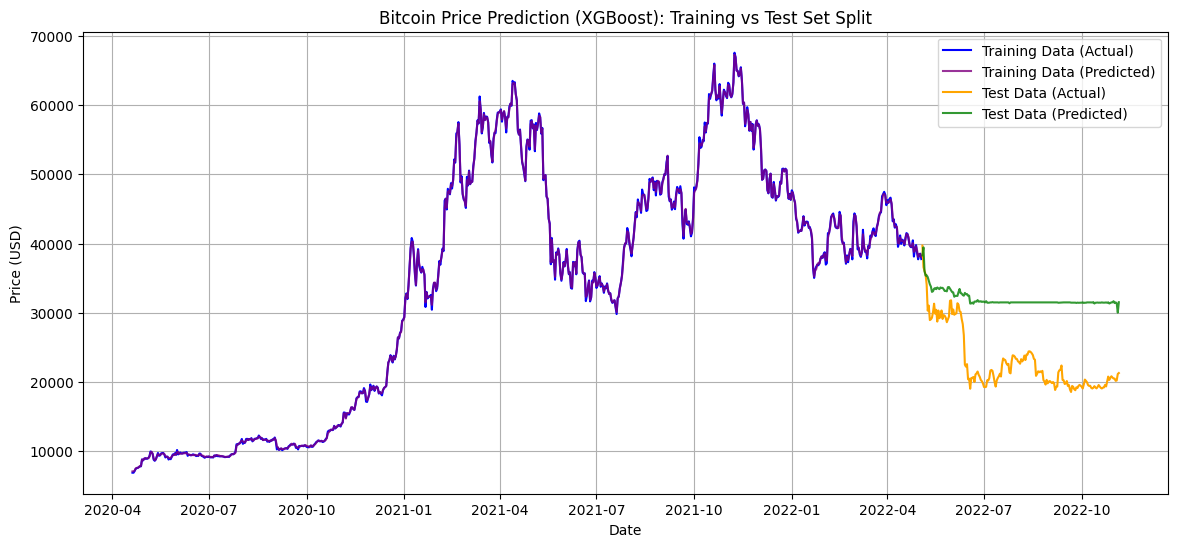

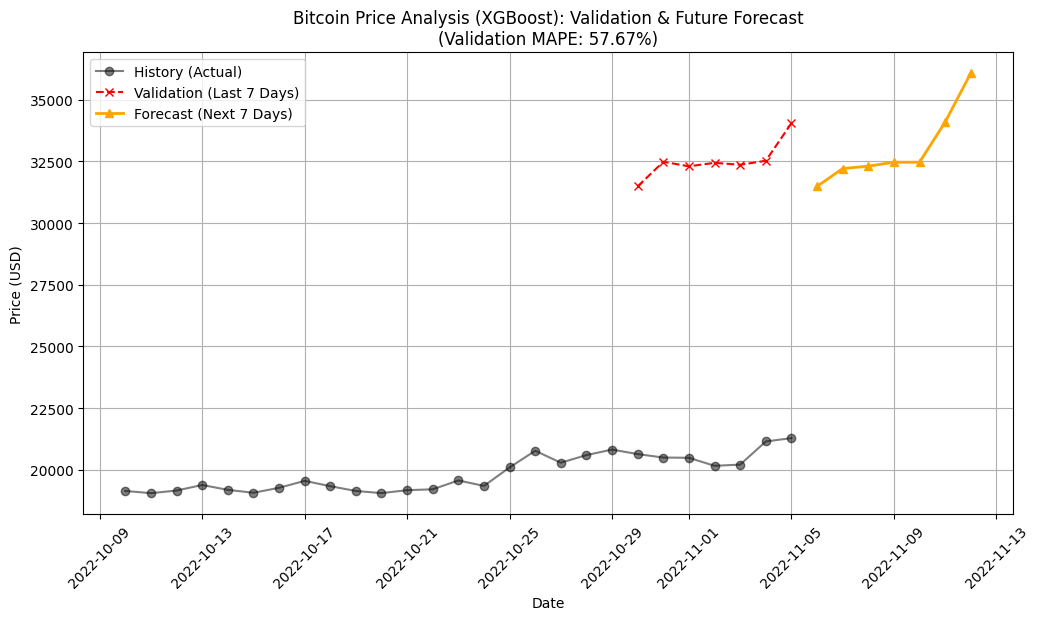

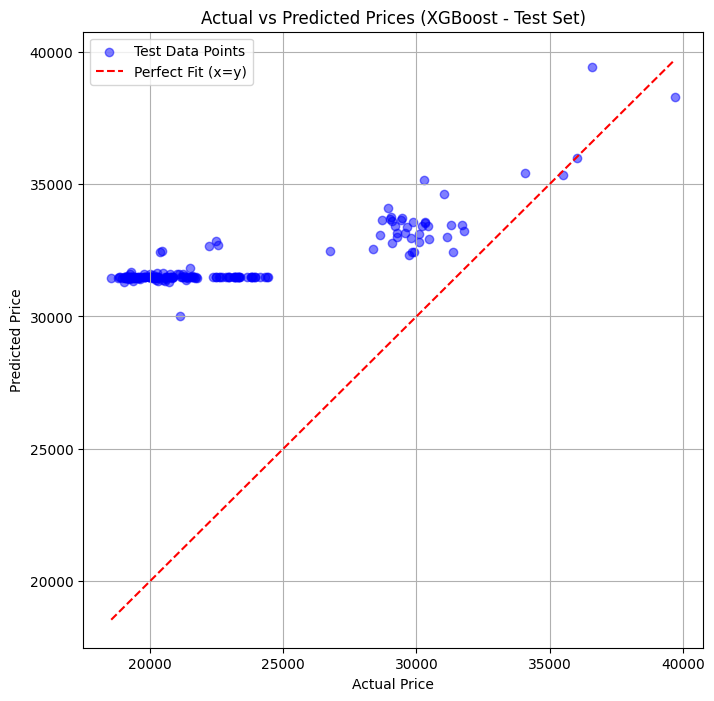


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $31491.22  | +52.61%
2022-10-31 | $20495.77  | $32487.02  | +58.51%
2022-11-01 | $20485.27  | $32303.21  | +57.69%
2022-11-02 | $20159.50  | $32443.76  | +60.94%
2022-11-03 | $20209.99  | $32365.39  | +60.15%
2022-11-04 | $21147.23  | $32528.47  | +53.82%
2022-11-05 | $21282.69  | $34048.39  | +59.98%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $31487.96 
2022-11-07 | $32211.70 
2022-11-08 | $32309.64 
2022-11-09 | $32468.71 
2022-11-10 | $32468.71 
2022-11-11 | $34096.79 
2022-11-12 | $36079.30 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

data = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42, n_jobs=-1)

print("Training model...")
model.fit(X_train, y_train)


train_predict = model.predict(X_train).reshape(-1, 1)
test_predict = model.predict(X_test).reshape(-1, 1)


train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])


train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))

train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0]) * 100
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100

print(f"\n--- General Model Performance ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_data) - days_to_predict

actual_last_7 = scaler.inverse_transform(scaled_data[test_start_index:])

current_batch = scaled_data[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back)

recursive_predictions = []


for i in range(days_to_predict):

    pred = model.predict(current_batch)[0]
    recursive_predictions.append(pred)


    current_batch = np.append(current_batch[:, 1:], [[pred]], axis=1)

recursive_predictions = np.array(recursive_predictions).reshape(-1, 1)
recursive_predictions = scaler.inverse_transform(recursive_predictions)

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_predictions))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_predictions) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")



print("\n--- Forecasting Future 7 Days ---")

last_60_days_full = scaled_data[-look_back:]
curr_batch_future = last_60_days_full.reshape(1, look_back)

future_predictions = []

for i in range(7):
    pred = model.predict(curr_batch_future)[0]
    future_predictions.append(pred)
    curr_batch_future = np.append(curr_batch_future[:, 1:], [[pred]], axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)


last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)


date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]


plt.figure(figsize=(14, 6))

plt.plot(train_dates, y_train_inv[0], color='blue', label='Training Data (Actual)')

plt.plot(train_dates, train_predict[:,0], color='purple', label='Training Data (Predicted)', alpha=0.8)


plt.plot(test_dates, y_test_inv[0], color='orange', label='Test Data (Actual)')

plt.plot(test_dates, test_predict[:,0], color='green', label='Test Data (Predicted)', alpha=0.8)

plt.title('Bitcoin Price Prediction (XGBoost): Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = scaler.inverse_transform(scaled_data[-(days_to_predict + 20):])

plt.figure(figsize=(12, 6))

plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')

plt.plot(last_7_dates, recursive_predictions, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')

plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')

plt.title(f'Bitcoin Price Analysis (XGBoost): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv[0], test_predict[:,0], alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (XGBoost - Test Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

min_val = min(np.min(y_test_inv), np.min(test_predict))
max_val = max(np.max(y_test_inv), np.max(test_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')

plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_predictions):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred[0]:<9.2f}")

Fitting lightGBM + 7 days forcast

fitting lightGBM with coin in article

Data Date Range: 2020-02-20 to 2022-11-05
Total Features: 20
Training Multivariate LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298308
[LightGBM] [Info] Number of data points in the train set: 744, number of used features: 1200
[LightGBM] [Info] Start training from score 0.469699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- General Model Performance (Multivariate LightGBM) ---
Train RMSE: $220.44 | Train MAPE: 0.34%
Test RMSE:  $11453.92  | Test MAPE:  51.13%


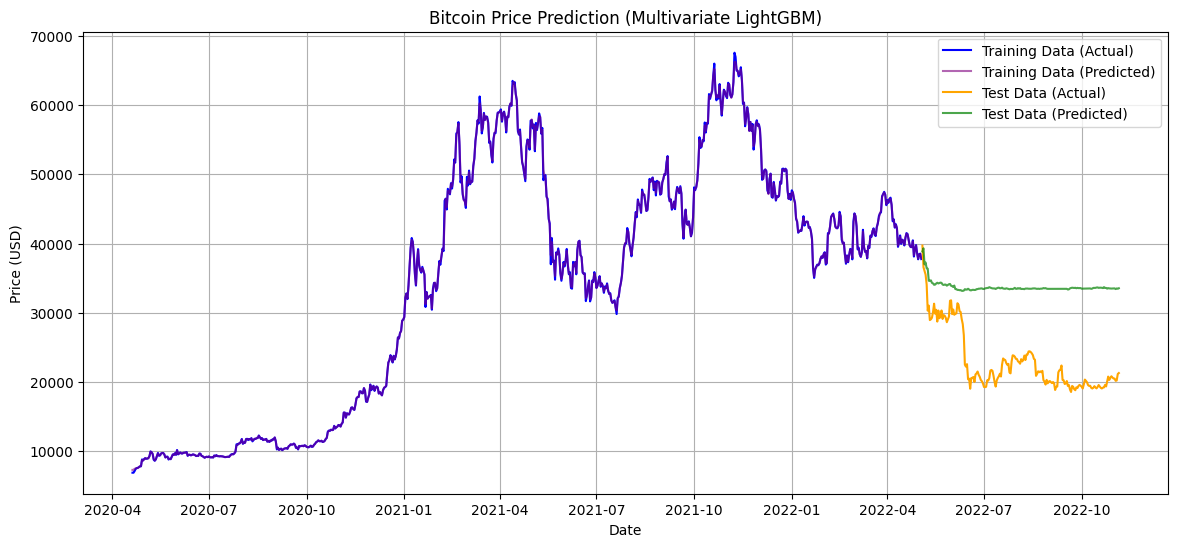


--- Validating Last 7 Days (Recursive Forecast) ---

Last 7 Days Comparison:
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $33507.36  | +62.38%
2022-10-31 | $20495.77  | $33508.57  | +63.49%
2022-11-01 | $20485.27  | $33517.57  | +63.62%
2022-11-02 | $20159.50  | $33418.41  | +65.77%
2022-11-03 | $20209.99  | $33511.07  | +65.81%
2022-11-04 | $21147.23  | $33463.94  | +58.24%
2022-11-05 | $21282.69  | $33535.33  | +57.57%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)


df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])

pivot_df = df.pivot_table(index='Date', columns='Coin', values=['Open', 'High', 'Low', 'Close'])

pivot_df.columns = [f"{col[1]}_{col[0]}" for col in pivot_df.columns]

target_coin = 'btc'
feature_coins = ['eth', 'xrp', 'doge', 'ada']

metrics = ['Open', 'High', 'Low', 'Close']

selected_features = []

for metric in metrics:
    selected_features.append(f"{target_coin}_{metric}")

for coin in feature_coins:
    for metric in metrics:
        selected_features.append(f"{coin}_{metric}")


data_df = pivot_df[selected_features].copy()

data_df = data_df.dropna()

print(f"Data Date Range: {data_df.index.min().date()} to {data_df.index.max().date()}")
print(f"Total Features: {len(data_df.columns)}")

target_col_name = f"{target_coin}_Close"
target_data = data_df[[target_col_name]].values
feature_data = data_df.values

feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit_transform(feature_data)
scaled_target = target_scaler.fit_transform(target_data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_features)):

    X.append(scaled_features[i-look_back:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)


num_samples, time_steps, num_features = X.shape
X_flattened = X.reshape(num_samples, time_steps * num_features)

train_size = int(len(X_flattened) * 0.8)
X_train, X_test = X_flattened[:train_size], X_flattened[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=seed_value,
    n_jobs=-1
)

print("Training Multivariate LightGBM model...")
model.fit(X_train, y_train)


train_predict = model.predict(X_train).reshape(-1, 1)
test_predict = model.predict(X_test).reshape(-1, 1)

train_predict = target_scaler.inverse_transform(train_predict)
y_train_inv = target_scaler.inverse_transform(y_train)
test_predict = target_scaler.inverse_transform(test_predict)
y_test_inv = target_scaler.inverse_transform(y_test)

train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
train_mape = mean_absolute_percentage_error(y_train_inv, train_predict) * 100
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict) * 100

print(f"\n--- General Model Performance (Multivariate LightGBM) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")


dates = data_df.index[look_back:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_predict, color='purple', label='Training Data (Predicted)', alpha=0.6)
plt.plot(test_dates, y_test_inv, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_predict, color='green', label='Test Data (Predicted)', alpha=0.7)
plt.title('Bitcoin Price Prediction (Multivariate LightGBM)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_idx = len(scaled_features) - days_to_predict

actual_last_7 = target_scaler.inverse_transform(scaled_target[-days_to_predict:])

pred_last_7_scaled = model.predict(X_flattened[-days_to_predict:]).reshape(-1, 1)
pred_last_7 = target_scaler.inverse_transform(pred_last_7_scaled)

print("\nLast 7 Days Comparison:")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
last_7_dates_val = dates[-days_to_predict:]

for date, act, pred in zip(last_7_dates_val, actual_last_7, pred_last_7):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14918
[LightGBM] [Info] Number of data points in the train set: 744, number of used features: 60
[LightGBM] [Info] Start training from score 0.469699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

Last 7 Days RMSE: $10690.45
Last 7 Days MAPE: 51.82%

--- Forecasting Future 7 Days ---


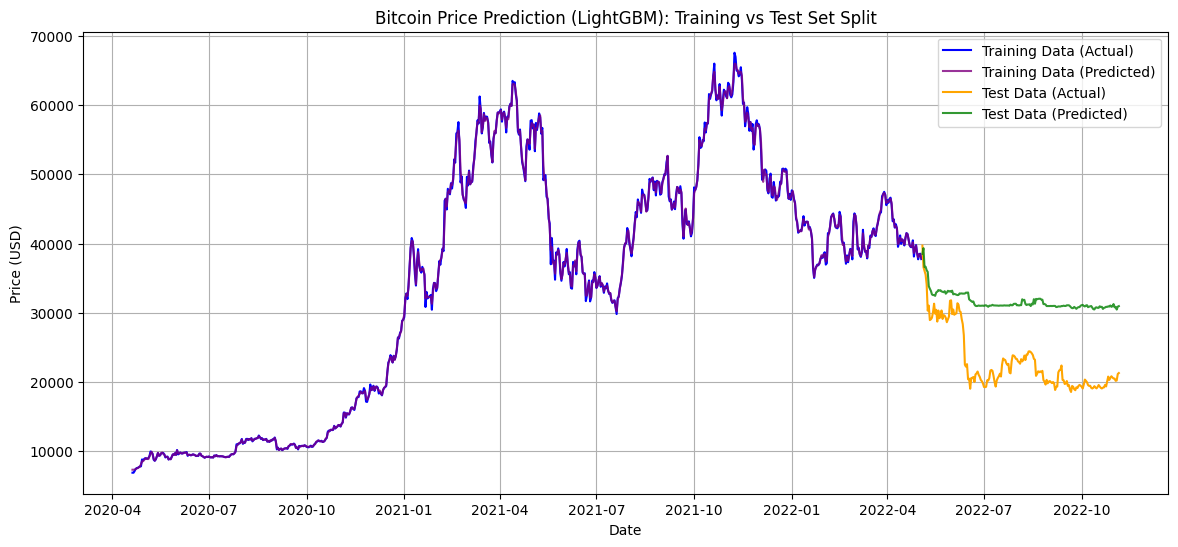

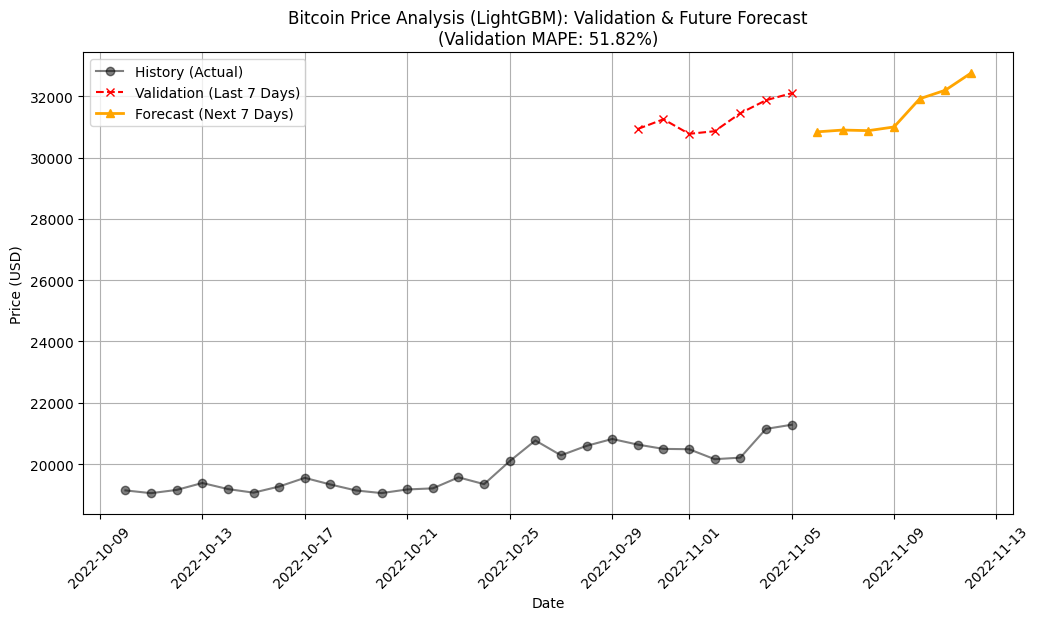

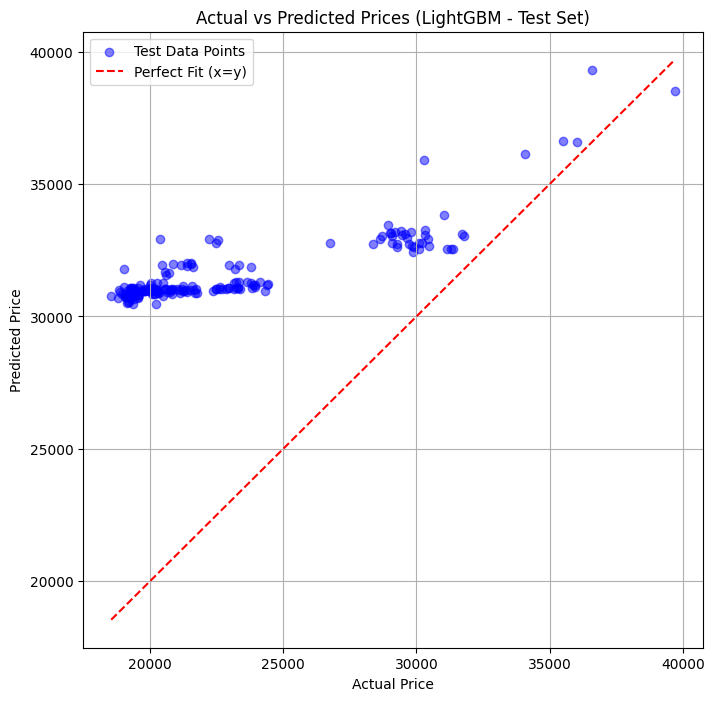


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $30930.85  | +49.89%
2022-10-31 | $20495.77  | $31248.19  | +52.46%
2022-11-01 | $20485.27  | $30772.49  | +50.22%
2022-11-02 | $20159.50  | $30858.27  | +53.07%
2022-11-03 | $20209.99  | $31444.60  | +55.59%
2022-11-04 | $21147.23  | $31867.52  | +50.69%
2022-11-05 | $21282.69  | $32097.60  | +50.82%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $30837.50 
2022-11-07 | $30896.12 
2022-11-08 | $30876.67 
2022-11-09 | $30997.11 
2022-11-10 | $31915.43 
2022-11-11 | $32194.64 
2022-11-12 | $32751.61 


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

data = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=seed_value,
    n_jobs=-1
)

print("Training model...")
model.fit(X_train, y_train)


train_predict = model.predict(X_train).reshape(-1, 1)
test_predict = model.predict(X_test).reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))

train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0]) * 100
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100

print(f"\n--- General Model Performance ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_data) - days_to_predict

actual_last_7 = scaler.inverse_transform(scaled_data[test_start_index:])

current_batch = scaled_data[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back)

recursive_predictions = []

for i in range(days_to_predict):
    pred = model.predict(current_batch)[0]
    recursive_predictions.append(pred)

    current_batch = np.append(current_batch[:, 1:], [[pred]], axis=1)

recursive_predictions = np.array(recursive_predictions).reshape(-1, 1)
recursive_predictions = scaler.inverse_transform(recursive_predictions)

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_predictions))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_predictions) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_full = scaled_data[-look_back:]
curr_batch_future = last_60_days_full.reshape(1, look_back)

future_predictions = []

for i in range(7):
    pred = model.predict(curr_batch_future)[0]
    future_predictions.append(pred)
    curr_batch_future = np.append(curr_batch_future[:, 1:], [[pred]], axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]


plt.figure(figsize=(14, 6))


plt.plot(train_dates, y_train_inv[0], color='blue', label='Training Data (Actual)')


plt.plot(train_dates, train_predict[:,0], color='purple', label='Training Data (Predicted)', alpha=0.8)


plt.plot(test_dates, y_test_inv[0], color='orange', label='Test Data (Actual)')

plt.plot(test_dates, test_predict[:,0], color='green', label='Test Data (Predicted)', alpha=0.8)

plt.title('Bitcoin Price Prediction (LightGBM): Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = scaler.inverse_transform(scaled_data[-(days_to_predict + 20):])

plt.figure(figsize=(12, 6))

plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')

plt.plot(last_7_dates, recursive_predictions, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')

plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')

plt.title(f'Bitcoin Price Analysis (LightGBM): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv[0], test_predict[:,0], alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (LightGBM - Test Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

min_val = min(np.min(y_test_inv), np.min(test_predict))
max_val = max(np.max(y_test_inv), np.max(test_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')

plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_predictions):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred[0]:<9.2f}")

Fitting LSTM + 7 days forcast

fitting with article coins

Data Date Range: 2020-02-20 to 2022-11-05
Total Features: 20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Multivariate LSTM model...
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0965
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0101
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

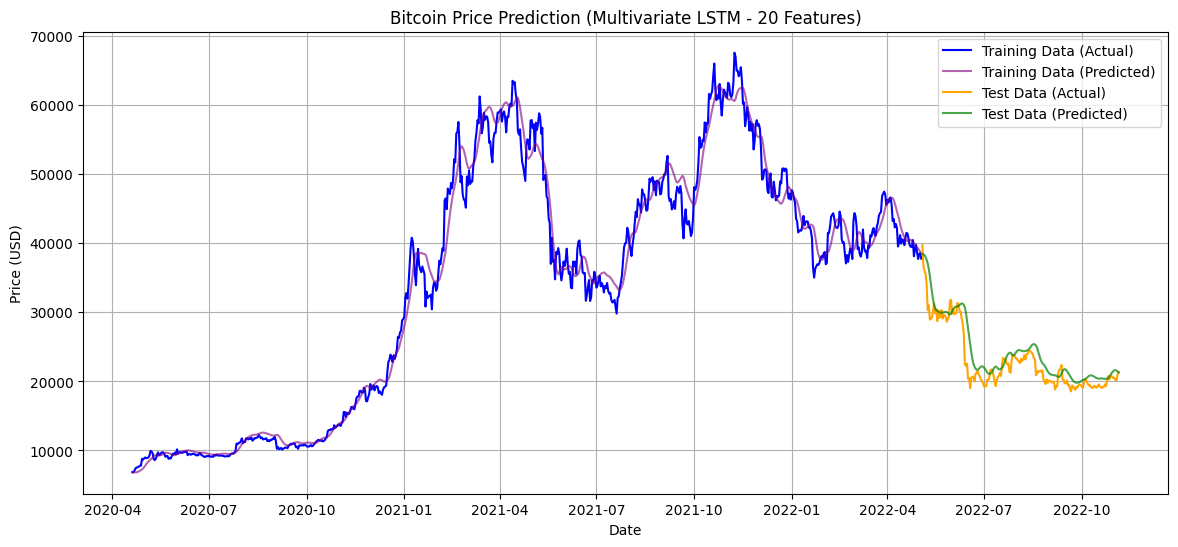


--- Validating Last 7 Days (Recursive Forecast) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Last 7 Days Comparison:
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $21353.99  | +3.48%
2022-10-31 | $20495.77  | $21520.05  | +5.00%
2022-11-01 | $20485.27  | $21608.04  | +5.48%
2022-11-02 | $20159.50  | $21623.50  | +7.26%
2022-11-03 | $20209.99  | $21549.20  | +6.63%
2022-11-04 | $21147.23  | $21415.95  | +1.27%
2022-11-05 | $21282.69  | $21304.31  | +0.10%


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])


pivot_df = df.pivot_table(index='Date', columns='Coin', values=['Open', 'High', 'Low', 'Close'])

pivot_df.columns = [f"{col[1]}_{col[0]}" for col in pivot_df.columns]

target_coin = 'btc'
feature_coins = ['eth', 'xrp', 'doge', 'ada']

metrics = ['Open', 'High', 'Low', 'Close']

selected_features = []

for metric in metrics:
    selected_features.append(f"{target_coin}_{metric}")

for coin in feature_coins:
    for metric in metrics:
        selected_features.append(f"{coin}_{metric}")

selected_features = ['btc_Open', 'btc_High', 'btc_Low', 'btc_Close', 'eth_Open', 'eth_High', 'eth_Low', 'eth_Close', 'xrp_Open', 'xrp_High', 'xrp_Low', 'xrp_Close', 'doge_Open', 'doge_High', 'doge_Low', 'doge_Close', 'ada_Open', 'ada_High', 'ada_Low', 'ada_Close']

data_df = pivot_df[selected_features].copy()

data_df = data_df.dropna()

print(f"Data Date Range: {data_df.index.min().date()} to {data_df.index.max().date()}")
print(f"Total Features: {len(data_df.columns)}")

target_col_name = f"{target_coin}_Close"
target_data = data_df[[target_col_name]].values
feature_data = data_df.values

feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit_transform(feature_data)
scaled_target = target_scaler.fit_transform(target_data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_features)):
    X.append(scaled_features[i-look_back:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Multivariate LSTM model...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = target_scaler.inverse_transform(train_predict)
y_train_inv = target_scaler.inverse_transform(y_train)
test_predict = target_scaler.inverse_transform(test_predict)
y_test_inv = target_scaler.inverse_transform(y_test)

train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
train_mape = mean_absolute_percentage_error(y_train_inv, train_predict) * 100
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict) * 100

print(f"\n--- General Model Performance (Multivariate LSTM) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

dates = data_df.index[look_back:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_predict, color='purple', label='Training Data (Predicted)', alpha=0.6)
plt.plot(test_dates, y_test_inv, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_predict, color='green', label='Test Data (Predicted)', alpha=0.7)
plt.title('Bitcoin Price Prediction (Multivariate LSTM - 20 Features)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7

actual_last_7 = target_scaler.inverse_transform(scaled_target[-days_to_predict:])

X_last_7 = X[-days_to_predict:]

pred_last_7_scaled = model.predict(X_last_7)
pred_last_7 = target_scaler.inverse_transform(pred_last_7_scaled)

print("\nLast 7 Days Comparison:")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
last_7_dates_val = dates[-days_to_predict:]

for date, act, pred in zip(last_7_dates_val, actual_last_7, pred_last_7):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

Training model...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1077
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050
Epoch 16/25
24/24 ━━━━━━━━━━━━

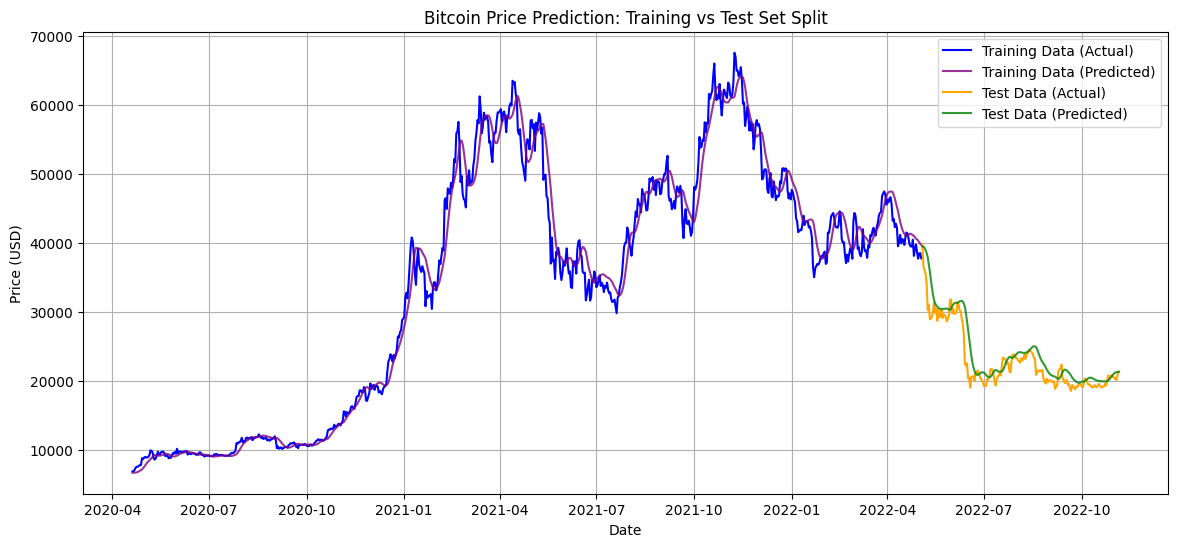

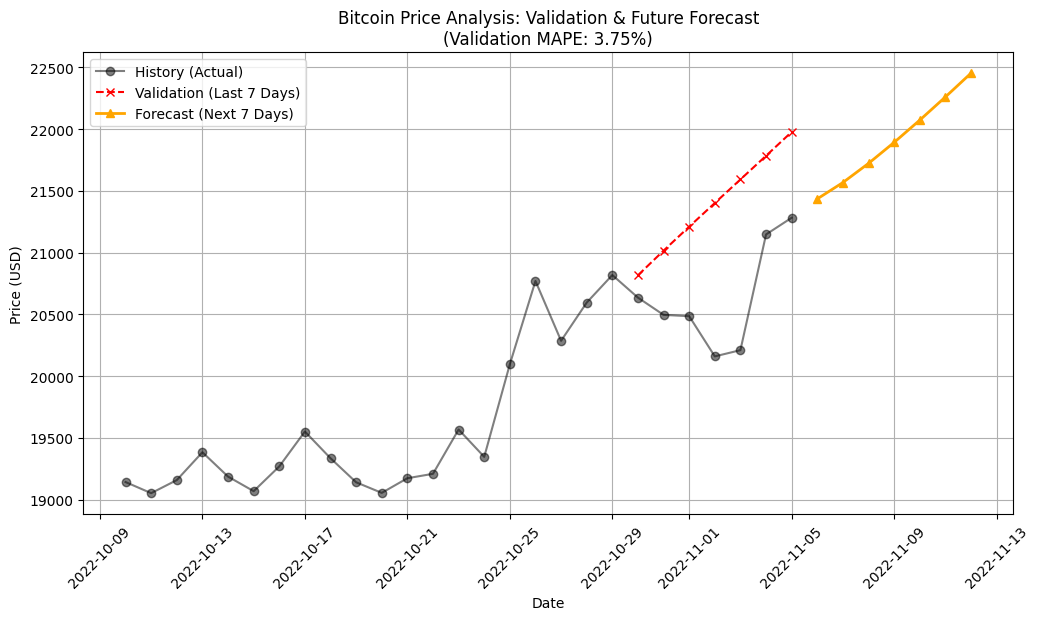

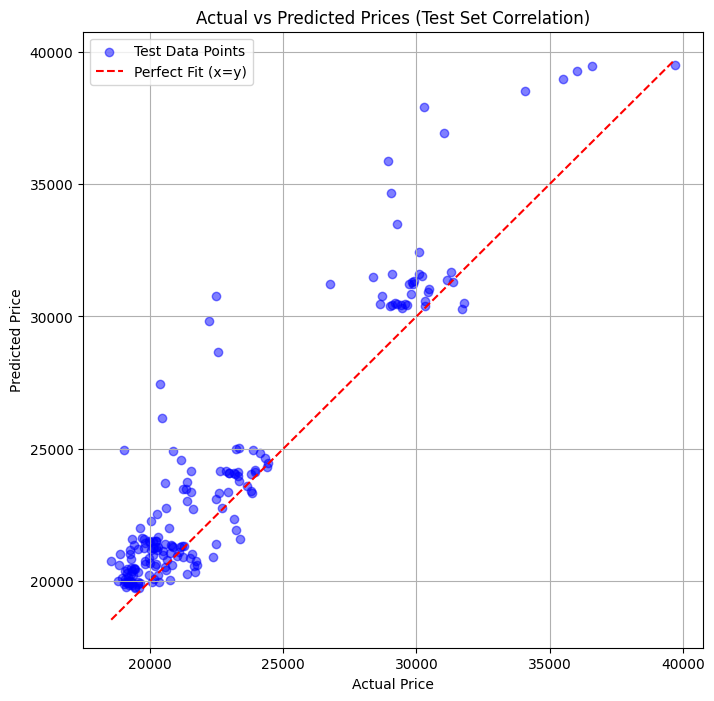


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20816.73  | +0.88%
2022-10-31 | $20495.77  | $21016.13  | +2.54%
2022-11-01 | $20485.27  | $21210.29  | +3.54%
2022-11-02 | $20159.50  | $21401.92  | +6.16%
2022-11-03 | $20209.99  | $21592.95  | +6.84%
2022-11-04 | $21147.23  | $21784.68  | +3.01%
2022-11-05 | $21282.69  | $21977.93  | +3.27%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21435.53 
2022-11-07 | $21568.00 
2022-11-08 | $21723.03 
2022-11-09 | $21893.16 
2022-11-10 | $22073.53 
2022-11-11 | $22261.09 
2022-11-12 | $22453.98 


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

data = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training model...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))

train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0]) * 100
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100

print(f"\n--- General Model Performance ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_data) - days_to_predict

actual_last_7 = scaler.inverse_transform(scaled_data[test_start_index:])

current_batch = scaled_data[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back, 1)

recursive_predictions = []

for i in range(days_to_predict):
    pred = model.predict(current_batch, verbose=0)[0]
    recursive_predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

recursive_predictions = scaler.inverse_transform(recursive_predictions)

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_predictions))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_predictions) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_full = scaled_data[-look_back:]
curr_batch_future = last_60_days_full.reshape(1, look_back, 1)

future_predictions = []

for i in range(7):
    pred = model.predict(curr_batch_future, verbose=0)[0]
    future_predictions.append(pred)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], [[pred]], axis=1)

future_predictions = scaler.inverse_transform(future_predictions)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))

plt.plot(train_dates, y_train_inv[0], color='blue', label='Training Data (Actual)')

plt.plot(train_dates, train_predict[:,0], color='purple', label='Training Data (Predicted)', alpha=0.8)

plt.plot(test_dates, y_test_inv[0], color='orange', label='Test Data (Actual)')

plt.plot(test_dates, test_predict[:,0], color='green', label='Test Data (Predicted)', alpha=0.8)

plt.title('Bitcoin Price Prediction: Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = scaler.inverse_transform(scaled_data[-(days_to_predict + 20):])

plt.figure(figsize=(12, 6))

plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')

plt.plot(last_7_dates, recursive_predictions, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')

plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')

plt.title(f'Bitcoin Price Analysis: Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv[0], test_predict[:,0], alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Test Set Correlation)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

min_val = min(np.min(y_test_inv), np.min(test_predict))
max_val = max(np.max(y_test_inv), np.max(test_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')

plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_predictions):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred[0]:<9.2f}")

GRU 7 days forcasting

fitting the coins in arcticle

Data Date Range: 2020-02-20 to 2022-11-05
Total Features: 20
Training Multivariate GRU model...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0332
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044
Epoch 16/25
24/24 ━━━━━━━━━━━━

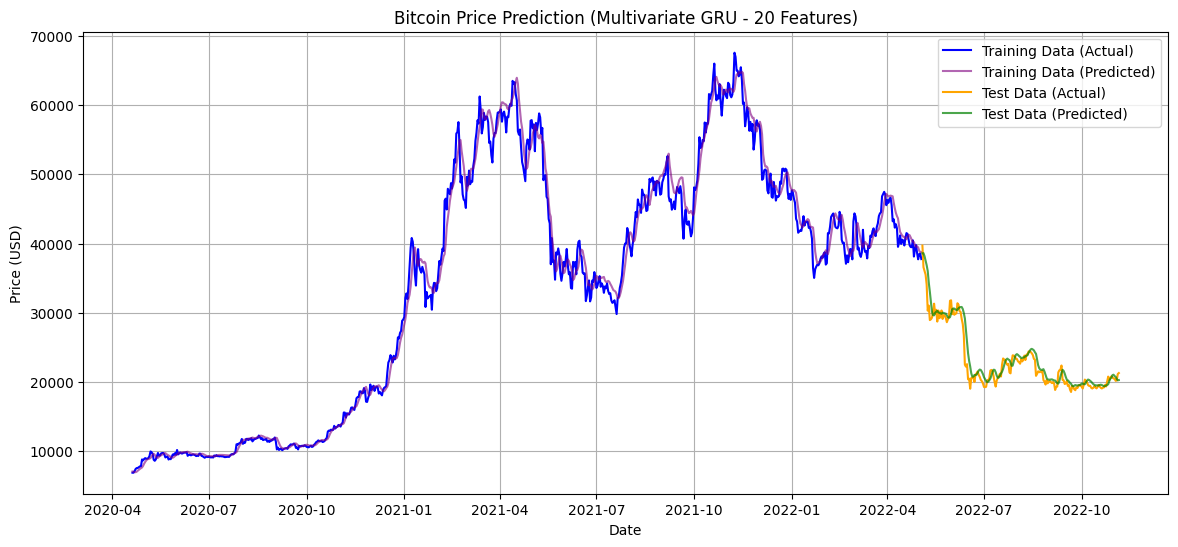


--- Validating Last 7 Days (Test Set Evaluation) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Last 7 Days Comparison:
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20985.61  | +1.70%
2022-10-31 | $20495.77  | $21042.40  | +2.67%
2022-11-01 | $20485.27  | $20848.43  | +1.77%
2022-11-02 | $20159.50  | $20739.82  | +2.88%
2022-11-03 | $20209.99  | $20439.85  | +1.14%
2022-11-04 | $21147.23  | $20235.62  | -4.31%
2022-11-05 | $21282.69  | $20267.80  | -4.77%


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])

pivot_df = df.pivot_table(index='Date', columns='Coin', values=['Open', 'High', 'Low', 'Close'])
pivot_df.columns = [f"{col[1]}_{col[0]}" for col in pivot_df.columns]

target_coin = 'btc'
feature_coins = ['eth', 'xrp', 'doge', 'ada']

metrics = ['Open', 'High', 'Low', 'Close']

selected_features = []

for metric in metrics:
    selected_features.append(f"{target_coin}_{metric}")

for coin in feature_coins:
    for metric in metrics:
        selected_features.append(f"{coin}_{metric}")

selected_features = ['btc_Open', 'btc_High', 'btc_Low', 'btc_Close', 'eth_Open', 'eth_High', 'eth_Low', 'eth_Close', 'xrp_Open', 'xrp_High', 'xrp_Low', 'xrp_Close', 'doge_Open', 'doge_High', 'doge_Low', 'doge_Close', 'ada_Open', 'ada_High', 'ada_Low', 'ada_Close']

data_df = pivot_df[selected_features].copy()

data_df = data_df.dropna()

print(f"Data Date Range: {data_df.index.min().date()} to {data_df.index.max().date()}")
print(f"Total Features: {len(data_df.columns)}")

target_col_name = f"{target_coin}_Close"
target_data = data_df[[target_col_name]].values
feature_data = data_df.values

feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit_transform(feature_data)
scaled_target = target_scaler.fit_transform(target_data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_features)):
    X.append(scaled_features[i-look_back:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Multivariate GRU model...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = target_scaler.inverse_transform(train_predict)
y_train_inv = target_scaler.inverse_transform(y_train)
test_predict = target_scaler.inverse_transform(test_predict)
y_test_inv = target_scaler.inverse_transform(y_test)

train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
train_mape = mean_absolute_percentage_error(y_train_inv, train_predict) * 100
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict) * 100

print(f"\n--- General Model Performance (Multivariate GRU) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

dates = data_df.index[look_back:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_predict, color='purple', label='Training Data (Predicted)', alpha=0.6)
plt.plot(test_dates, y_test_inv, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_predict, color='green', label='Test Data (Predicted)', alpha=0.7)
plt.title('Bitcoin Price Prediction (Multivariate GRU - 20 Features)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Validating Last 7 Days (Test Set Evaluation) ---")

days_to_predict = 7

actual_last_7 = target_scaler.inverse_transform(scaled_target[-days_to_predict:])

X_last_7 = X[-days_to_predict:]

pred_last_7_scaled = model.predict(X_last_7)
pred_last_7 = target_scaler.inverse_transform(pred_last_7_scaled)

print("\nLast 7 Days Comparison:")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
last_7_dates_val = dates[-days_to_predict:]

for date, act, pred in zip(last_7_dates_val, actual_last_7, pred_last_7):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

Training GRU model...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0706
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036
Epoch 16/25
24/24 ━━━━━━━━━━━━

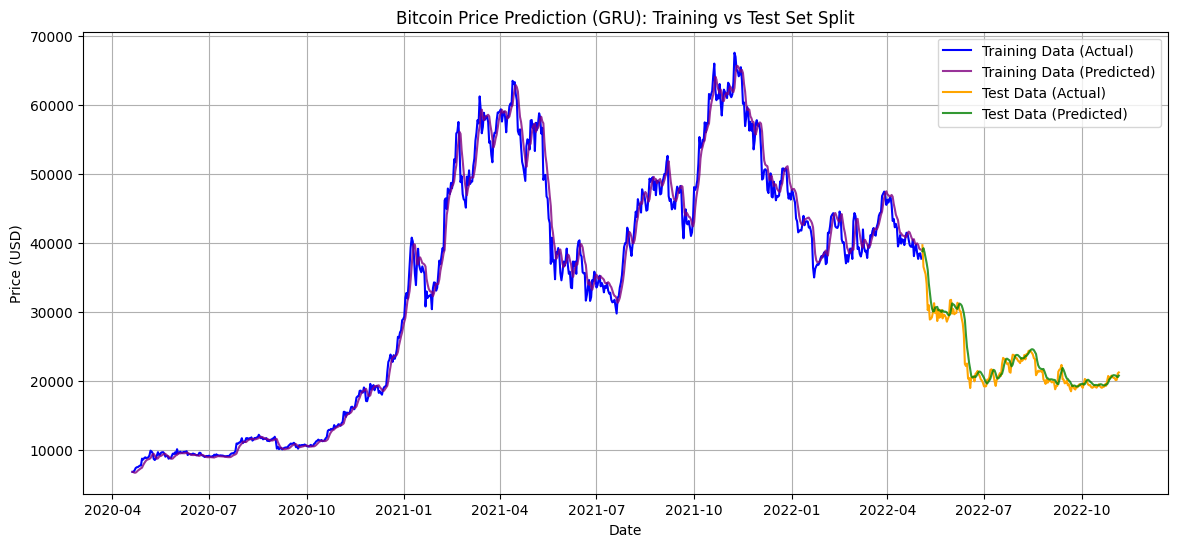

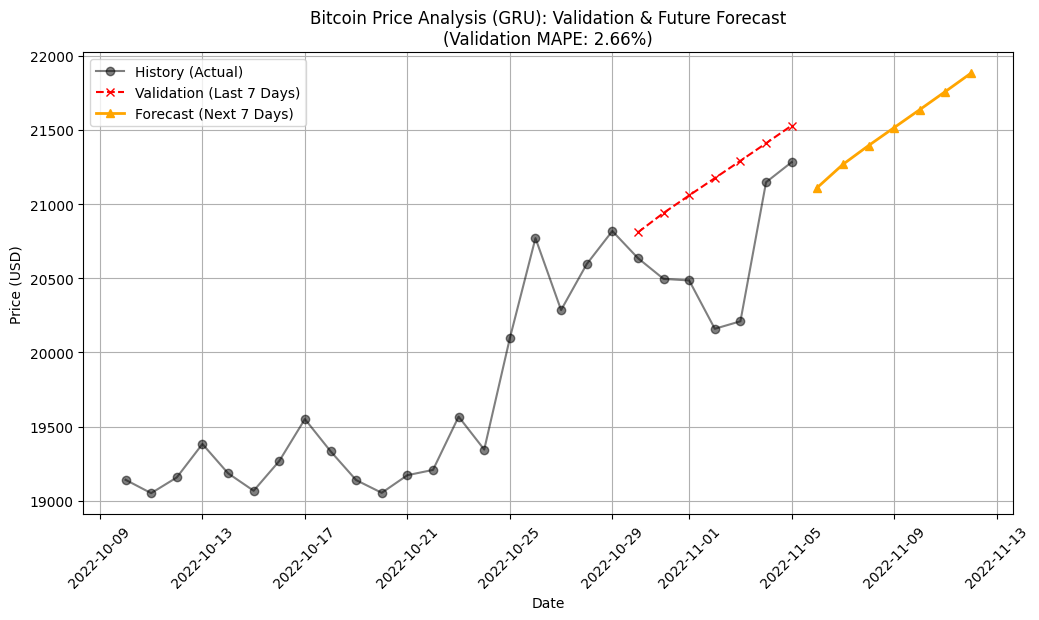

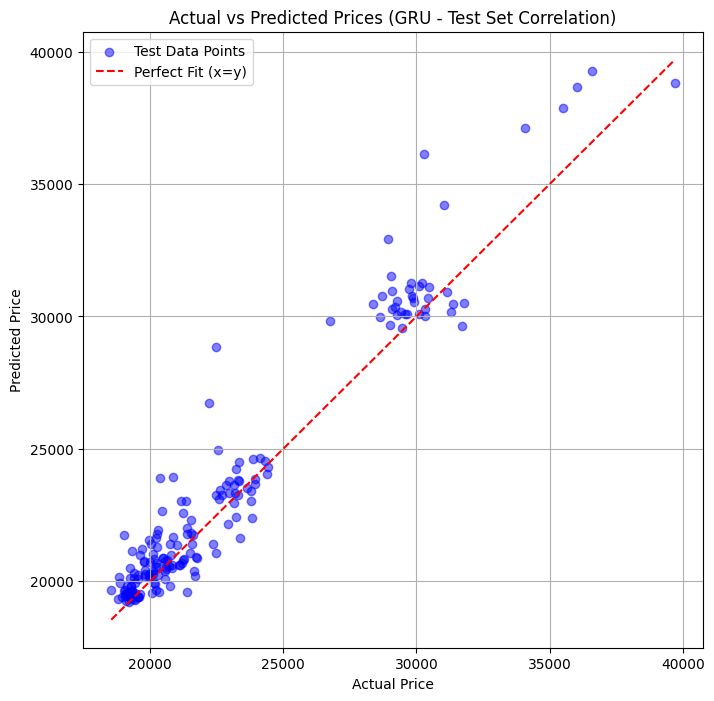


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20809.58  | +0.84%
2022-10-31 | $20495.77  | $20940.26  | +2.17%
2022-11-01 | $20485.27  | $21058.47  | +2.80%
2022-11-02 | $20159.50  | $21174.82  | +5.04%
2022-11-03 | $20209.99  | $21291.78  | +5.35%
2022-11-04 | $21147.23  | $21409.92  | +1.24%
2022-11-05 | $21282.69  | $21529.40  | +1.16%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21111.37 
2022-11-07 | $21267.50 
2022-11-08 | $21394.32 
2022-11-09 | $21515.54 
2022-11-10 | $21636.64 
2022-11-11 | $21758.87 
2022-11-12 | $21882.50 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

data = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training GRU model...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))
train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0]) * 100
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100

print(f"\n--- General Model Performance (Univariate GRU) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_data) - days_to_predict
actual_last_7 = scaler.inverse_transform(scaled_data[test_start_index:])

current_batch = scaled_data[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back, 1)

recursive_predictions = []

for i in range(days_to_predict):
    pred = model.predict(current_batch, verbose=0)[0]
    recursive_predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

recursive_predictions = scaler.inverse_transform(recursive_predictions)

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_predictions))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_predictions) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_full = scaled_data[-look_back:]
curr_batch_future = last_60_days_full.reshape(1, look_back, 1)
future_predictions = []

for i in range(7):
    pred = model.predict(curr_batch_future, verbose=0)[0]
    future_predictions.append(pred)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], [[pred]], axis=1)

future_predictions = scaler.inverse_transform(future_predictions)
last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv[0], color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_predict[:,0], color='purple', label='Training Data (Predicted)', alpha=0.8)
plt.plot(test_dates, y_test_inv[0], color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_predict[:,0], color='green', label='Test Data (Predicted)', alpha=0.8)
plt.title('Bitcoin Price Prediction (GRU): Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = scaler.inverse_transform(scaled_data[-(days_to_predict + 20):])

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_predictions, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (GRU): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv[0], test_predict[:,0], alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (GRU - Test Set Correlation)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
min_val = min(np.min(y_test_inv), np.min(test_predict))
max_val = max(np.max(y_test_inv), np.max(test_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_predictions):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred[0]:<9.2f}")

Fitting Bi-LSTM + 7 days forcat

Training Bi-LSTM model...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1005
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028
Epoch 16/25
24/

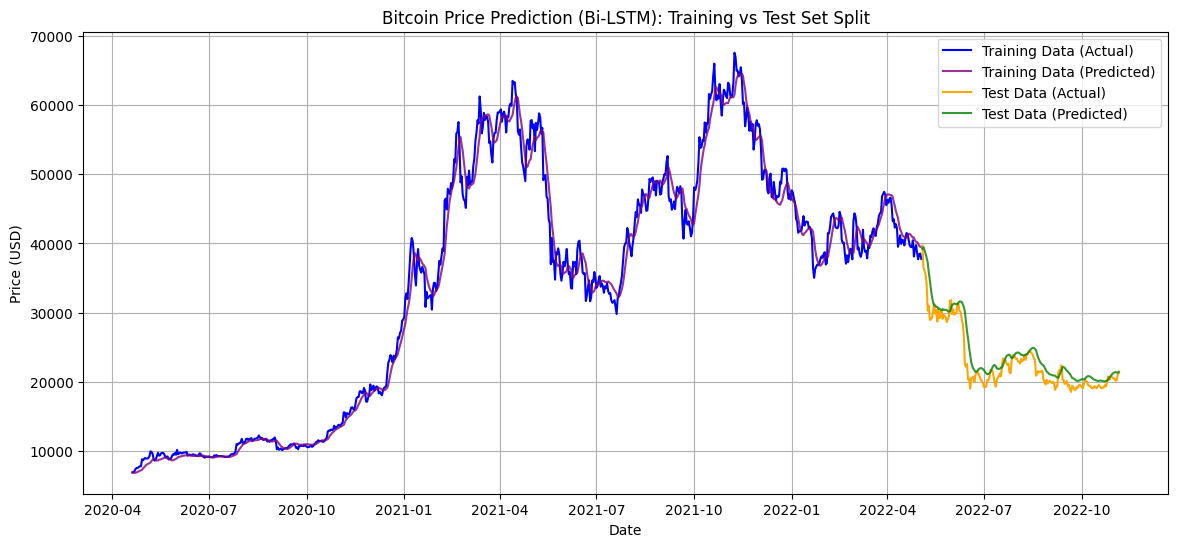

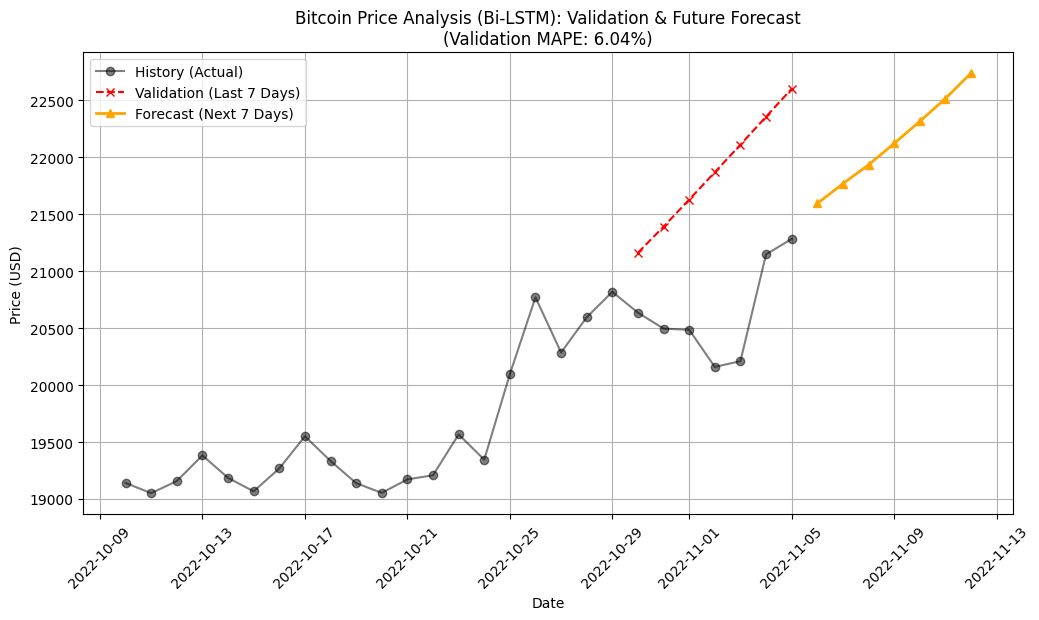

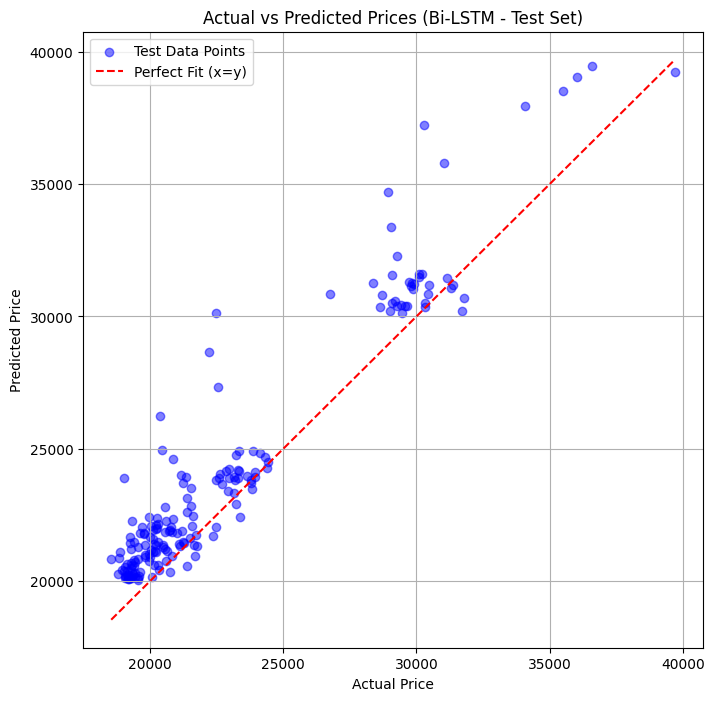


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $21161.66  | +2.55%
2022-10-31 | $20495.77  | $21390.77  | +4.37%
2022-11-01 | $20485.27  | $21627.89  | +5.58%
2022-11-02 | $20159.50  | $21868.32  | +8.48%
2022-11-03 | $20209.99  | $22109.81  | +9.40%
2022-11-04 | $21147.23  | $22355.35  | +5.71%
2022-11-05 | $21282.69  | $22601.09  | +6.19%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21594.21 
2022-11-07 | $21767.44 
2022-11-08 | $21933.38 
2022-11-09 | $22120.62 
2022-11-10 | $22314.92 
2022-11-11 | $22515.11 
2022-11-12 | $22737.82 


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

data = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Bi-LSTM model...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))
train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0]) * 100
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100

print(f"\n--- General Model Performance ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_data) - days_to_predict

actual_last_7 = scaler.inverse_transform(scaled_data[test_start_index:])

current_batch = scaled_data[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back, 1)

recursive_predictions = []

for i in range(days_to_predict):
    pred = model.predict(current_batch, verbose=0)[0]
    recursive_predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

recursive_predictions = scaler.inverse_transform(recursive_predictions)

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_predictions))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_predictions) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_full = scaled_data[-look_back:]
curr_batch_future = last_60_days_full.reshape(1, look_back, 1)

future_predictions = []

for i in range(7):
    pred = model.predict(curr_batch_future, verbose=0)[0]
    future_predictions.append(pred)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], [[pred]], axis=1)

future_predictions = scaler.inverse_transform(future_predictions)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))

plt.plot(train_dates, y_train_inv[0], color='blue', label='Training Data (Actual)')

plt.plot(train_dates, train_predict[:,0], color='purple', label='Training Data (Predicted)', alpha=0.8)

plt.plot(test_dates, y_test_inv[0], color='orange', label='Test Data (Actual)')

plt.plot(test_dates, test_predict[:,0], color='green', label='Test Data (Predicted)', alpha=0.8)

plt.title('Bitcoin Price Prediction (Bi-LSTM): Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = scaler.inverse_transform(scaled_data[-(days_to_predict + 20):])

plt.figure(figsize=(12, 6))

plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')

plt.plot(last_7_dates, recursive_predictions, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')

plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')

plt.title(f'Bitcoin Price Analysis (Bi-LSTM): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv[0], test_predict[:,0], alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Bi-LSTM - Test Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

min_val = min(np.min(y_test_inv), np.min(test_predict))
max_val = max(np.max(y_test_inv), np.max(test_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')

plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_predictions):
    diff = ((pred[0] - act[0]) / act[0]) * 100
    print(f"{date.date()} | ${act[0]:<9.2f} | ${pred[0]:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred[0]:<9.2f}")

Improved lightGBM

Training model on Price Changes...

--- General Model Performance (Reconstructed) ---
Train RMSE: $265.21 | Train MAPE: 0.60%
Test RMSE:  $985.05  | Test MAPE:  2.83%

--- Validating Last 7 Days (Recursive Forecast) ---
Last 7 Days RMSE: $1032.88
Last 7 Days MAPE: 4.31%

--- Forecasting Future 7 Days ---


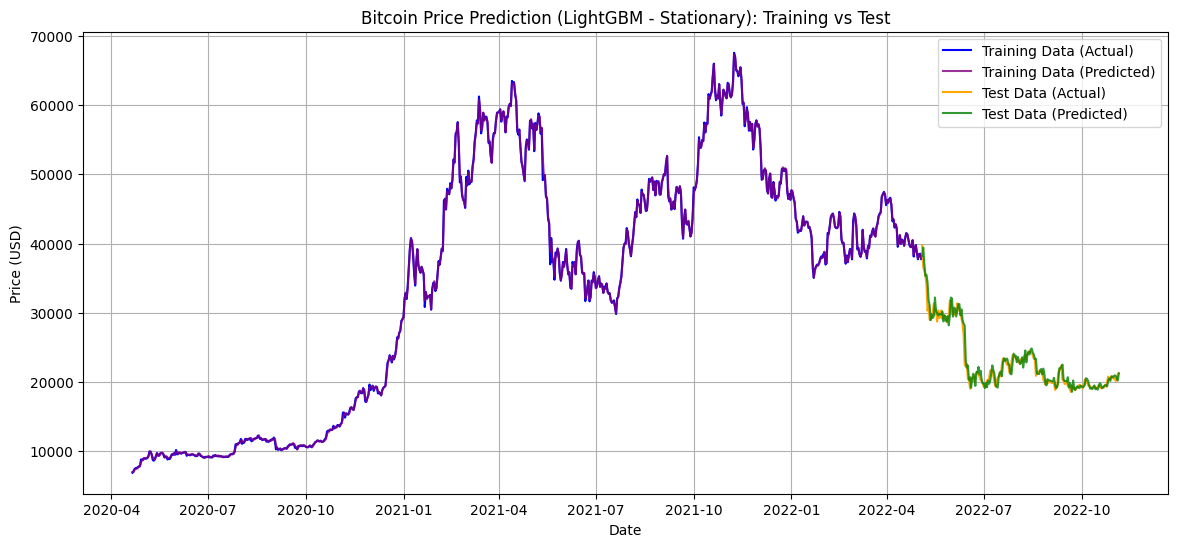

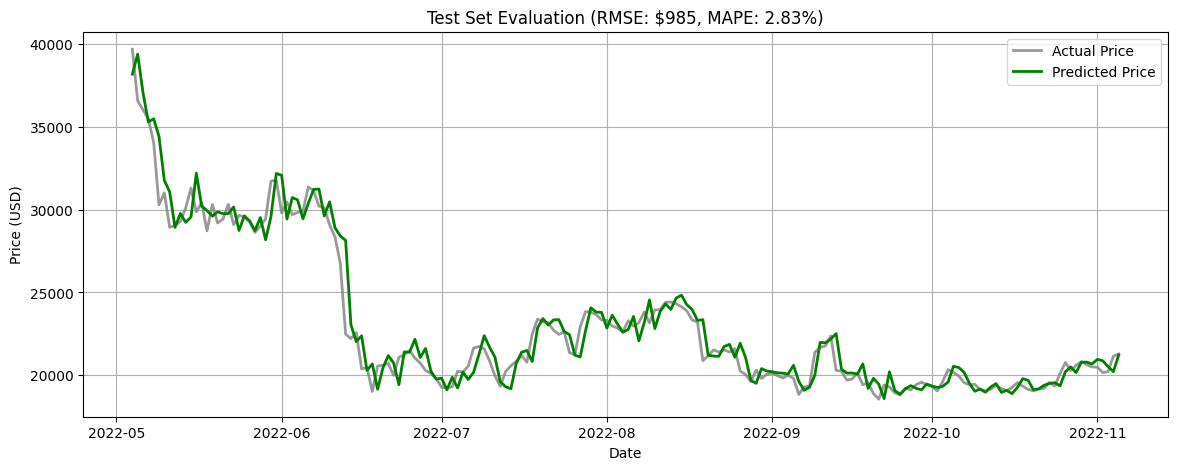

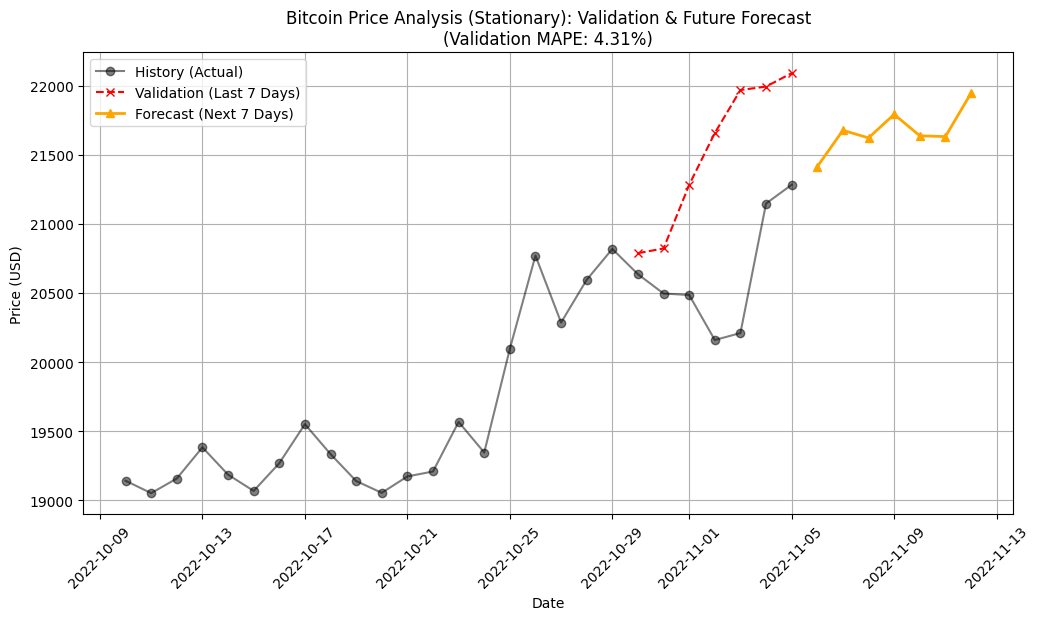

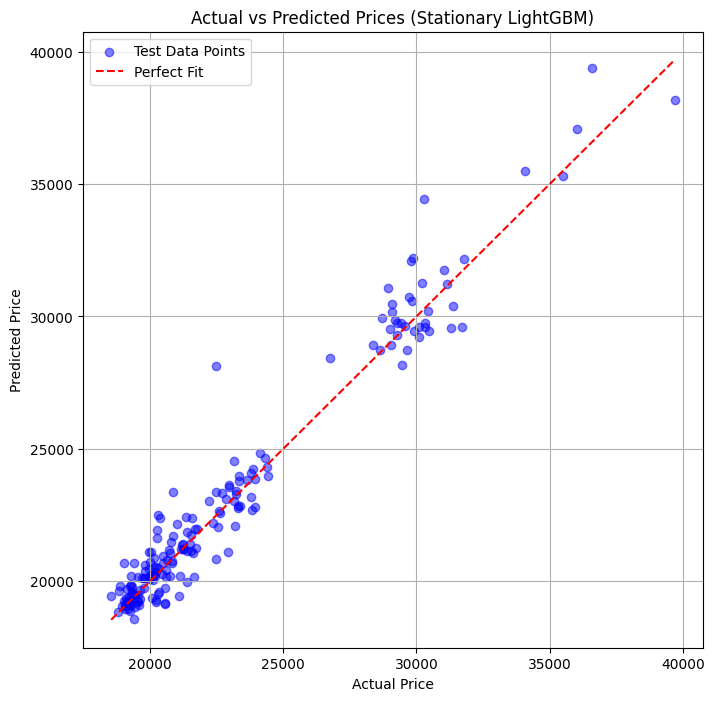


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20788.12  | +0.74%
2022-10-31 | $20495.77  | $20821.85  | +1.59%
2022-11-01 | $20485.27  | $21282.39  | +3.89%
2022-11-02 | $20159.50  | $21657.24  | +7.43%
2022-11-03 | $20209.99  | $21968.26  | +8.70%
2022-11-04 | $21147.23  | $21993.33  | +4.00%
2022-11-05 | $21282.69  | $22090.33  | +3.79%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21413.96 
2022-11-07 | $21676.95 
2022-11-08 | $21622.08 
2022-11-09 | $21792.35 
2022-11-10 | $21637.51 
2022-11-11 | $21631.27 
2022-11-12 | $21945.66 


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

coin_df['Prev_Close'] = coin_df['Close'].shift(1)
coin_df['Diff'] = coin_df['Close'] - coin_df['Prev_Close']
coin_df = coin_df.dropna().reset_index(drop=True)

data_diff = coin_df[['Diff']].values
data_close = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_diff = scaler.fit_transform(data_diff)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_diff)):
    X.append(scaled_diff[i-look_back:i, 0])
    y.append(scaled_diff[i, 0])

X, y = np.array(X), np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    num_leaves=20,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

print("Training model on Price Changes...")
model.fit(X_train, y_train)

train_pred_diff = model.predict(X_train).reshape(-1, 1)
test_pred_diff = model.predict(X_test).reshape(-1, 1)

train_pred_diff = scaler.inverse_transform(train_pred_diff)
test_pred_diff = scaler.inverse_transform(test_pred_diff)

train_prev_close = coin_df['Prev_Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
test_prev_close = coin_df['Prev_Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_pred_price = train_prev_close + train_pred_diff
test_pred_price = test_prev_close + test_pred_diff

y_train_actual = coin_df['Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
y_test_actual = coin_df['Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Reconstructed) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_diff) - days_to_predict

current_batch = scaled_diff[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back)

current_price = coin_df['Close'].iloc[test_start_index - 1]

recursive_prices = []

for i in range(days_to_predict):
    pred_diff_scaled = model.predict(current_batch)[0]

    current_batch = np.append(current_batch[:, 1:], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([[pred_diff_scaled]])[0][0]

    current_price = current_price + pred_diff
    recursive_prices.append(current_price)

actual_last_7 = coin_df['Close'].iloc[-days_to_predict:].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_diffs = scaled_diff[-look_back:]
curr_batch_future = last_60_diffs.reshape(1, look_back)
current_price_future = coin_df['Close'].iloc[-1]

future_predictions = []

for i in range(7):
    pred_diff_scaled = model.predict(curr_batch_future)[0]
    curr_batch_future = np.append(curr_batch_future[:, 1:], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([[pred_diff_scaled]])[0][0]
    current_price_future = current_price_future + pred_diff
    future_predictions.append(current_price_future)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_actual, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_pred_price, color='purple', label='Training Data (Predicted)', alpha=0.8)
plt.plot(test_dates, y_test_actual, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_pred_price, color='green', label='Test Data (Predicted)', alpha=0.8)
plt.title('Bitcoin Price Prediction (LightGBM - Stationary): Training vs Test')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(test_dates, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_dates, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (RMSE: ${test_rmse:.0f}, MAPE: {test_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = coin_df['Close'].iloc[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Stationary): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, test_pred_price, alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Stationary LightGBM)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
min_val = min(np.min(y_test_actual), np.min(test_pred_price))
max_val = max(np.max(y_test_actual), np.max(test_pred_price))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

XG boost differences

Training model on Price Changes...

--- General Model Performance (Reconstructed) ---
Train RMSE: $108.21 | Train MAPE: 0.36%
Test RMSE:  $940.72  | Test MAPE:  2.69%

--- Validating Last 7 Days (Recursive Forecast) ---
Last 7 Days RMSE: $826.06
Last 7 Days MAPE: 3.62%

--- Forecasting Future 7 Days ---


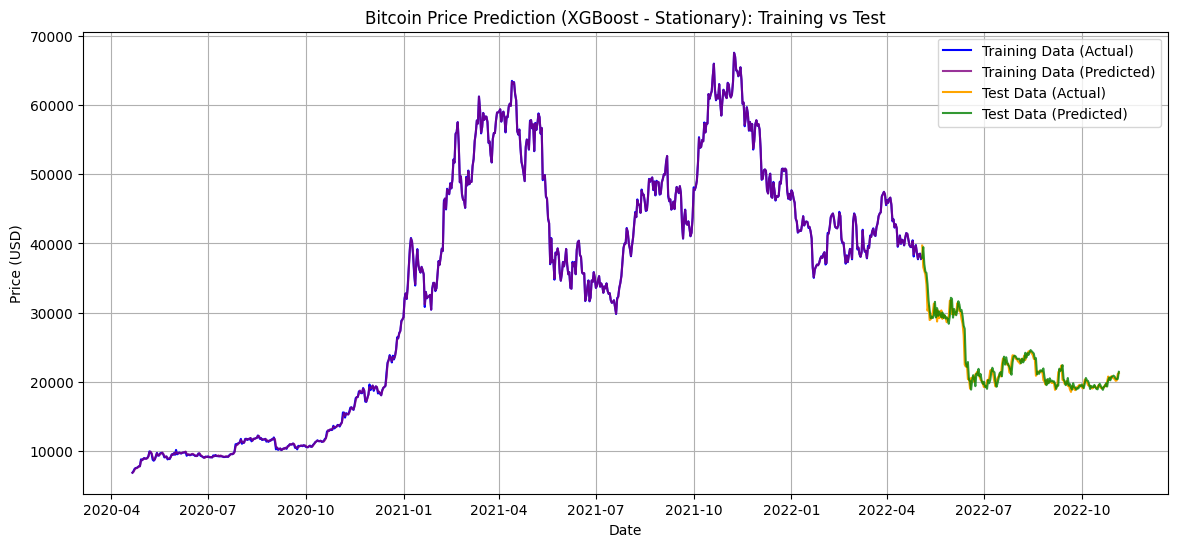

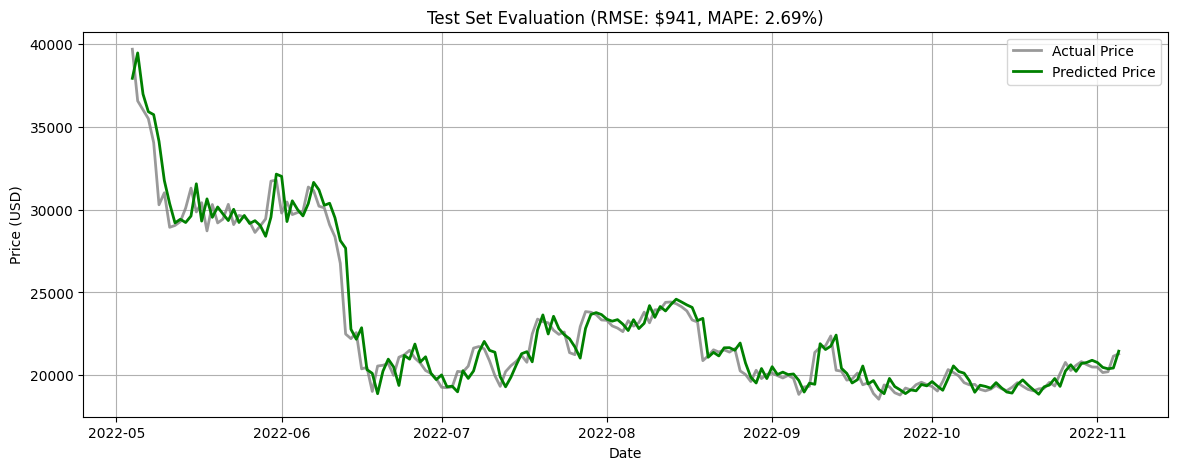

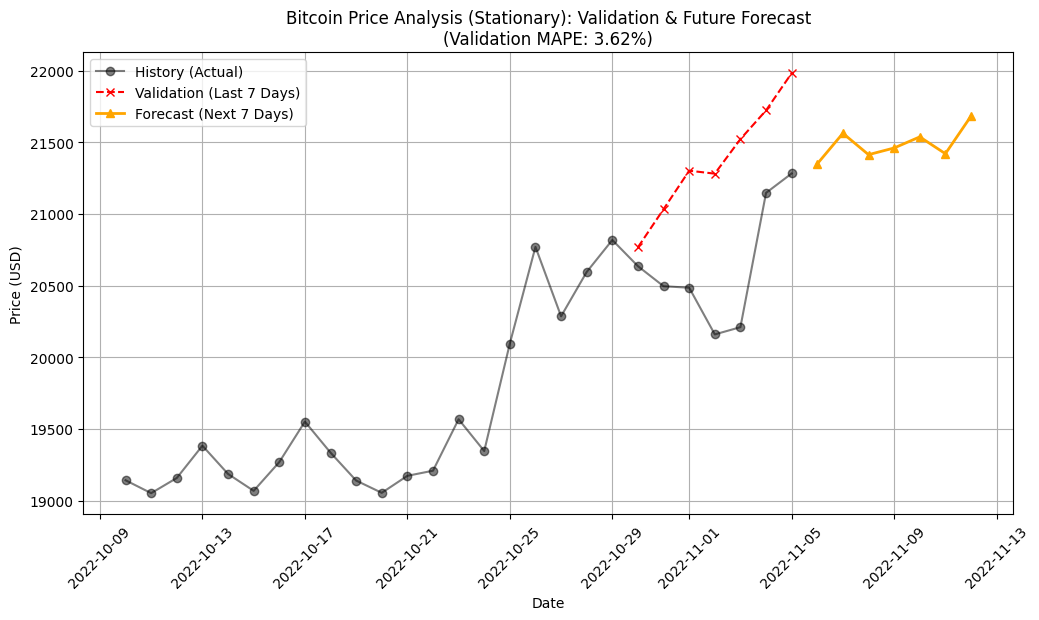

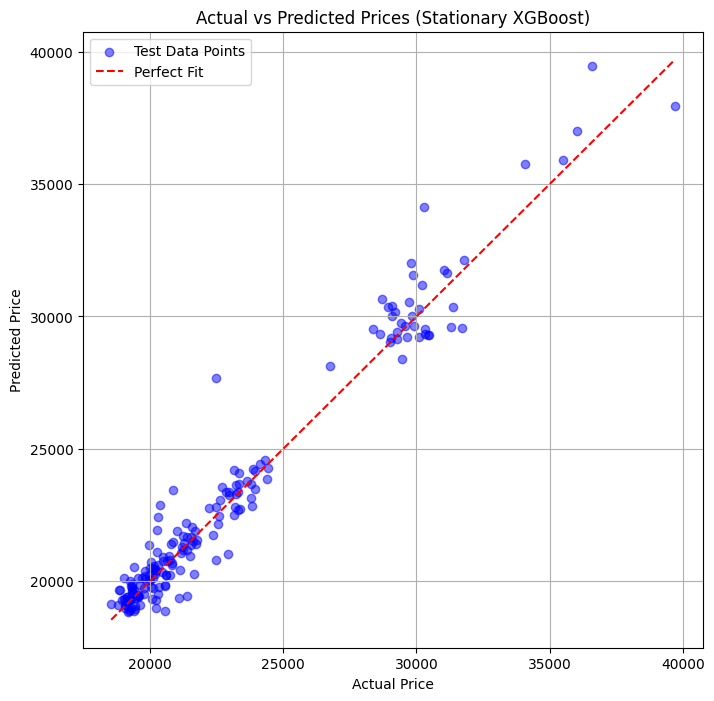


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20767.80  | +0.64%
2022-10-31 | $20495.77  | $21033.69  | +2.62%
2022-11-01 | $20485.27  | $21302.03  | +3.99%
2022-11-02 | $20159.50  | $21281.41  | +5.57%
2022-11-03 | $20209.99  | $21522.41  | +6.49%
2022-11-04 | $21147.23  | $21722.97  | +2.72%
2022-11-05 | $21282.69  | $21982.79  | +3.29%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21350.03 
2022-11-07 | $21563.09 
2022-11-08 | $21413.97 
2022-11-09 | $21460.65 
2022-11-10 | $21538.04 
2022-11-11 | $21420.60 
2022-11-12 | $21682.79 


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

coin_df['Prev_Close'] = coin_df['Close'].shift(1)
coin_df['Diff'] = coin_df['Close'] - coin_df['Prev_Close']
coin_df = coin_df.dropna().reset_index(drop=True)

data_diff = coin_df[['Diff']].values
data_close = coin_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_diff = scaler.fit_transform(data_diff)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_diff)):
    X.append(scaled_diff[i-look_back:i, 0])
    y.append(scaled_diff[i, 0])

X, y = np.array(X), np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=seed_value,
    n_jobs=-1,
    objective='reg:squarederror'
)

print("Training model on Price Changes...")
model.fit(X_train, y_train)

train_pred_diff = model.predict(X_train).reshape(-1, 1)
test_pred_diff = model.predict(X_test).reshape(-1, 1)

train_pred_diff = scaler.inverse_transform(train_pred_diff)
test_pred_diff = scaler.inverse_transform(test_pred_diff)

train_prev_close = coin_df['Prev_Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
test_prev_close = coin_df['Prev_Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_pred_price = train_prev_close + train_pred_diff
test_pred_price = test_prev_close + test_pred_diff

y_train_actual = coin_df['Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
y_test_actual = coin_df['Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Reconstructed) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_diff) - days_to_predict

current_batch = scaled_diff[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back)

current_price = coin_df['Close'].iloc[test_start_index - 1]

recursive_prices = []

for i in range(days_to_predict):
    pred_diff_scaled = model.predict(current_batch)[0]

    current_batch = np.append(current_batch[:, 1:], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([[pred_diff_scaled]])[0][0]

    current_price = current_price + pred_diff
    recursive_prices.append(current_price)

actual_last_7 = coin_df['Close'].iloc[-days_to_predict:].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_diffs = scaled_diff[-look_back:]
curr_batch_future = last_60_diffs.reshape(1, look_back)
current_price_future = coin_df['Close'].iloc[-1]

future_predictions = []

for i in range(7):
    pred_diff_scaled = model.predict(curr_batch_future)[0]
    curr_batch_future = np.append(curr_batch_future[:, 1:], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([[pred_diff_scaled]])[0][0]
    current_price_future = current_price_future + pred_diff
    future_predictions.append(current_price_future)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_actual, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_pred_price, color='purple', label='Training Data (Predicted)', alpha=0.8)
plt.plot(test_dates, y_test_actual, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_pred_price, color='green', label='Test Data (Predicted)', alpha=0.8)
plt.title('Bitcoin Price Prediction (XGBoost - Stationary): Training vs Test')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(test_dates, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_dates, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (RMSE: ${test_rmse:.0f}, MAPE: {test_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = coin_df['Close'].iloc[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Stationary): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, test_pred_price, alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Stationary XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
min_val = min(np.min(y_test_actual), np.min(test_pred_price))
max_val = max(np.max(y_test_actual), np.max(test_pred_price))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

LSTM differences

Training LSTM model on Price Changes...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1058
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111
Epoch 16/25
24/24 ━━━━━━━━━━━━

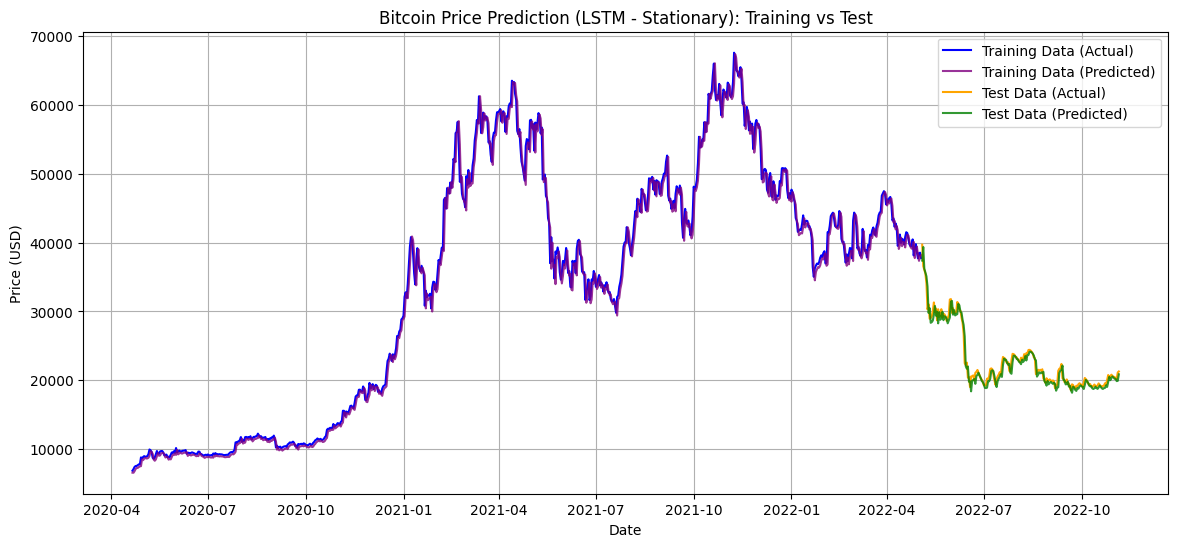

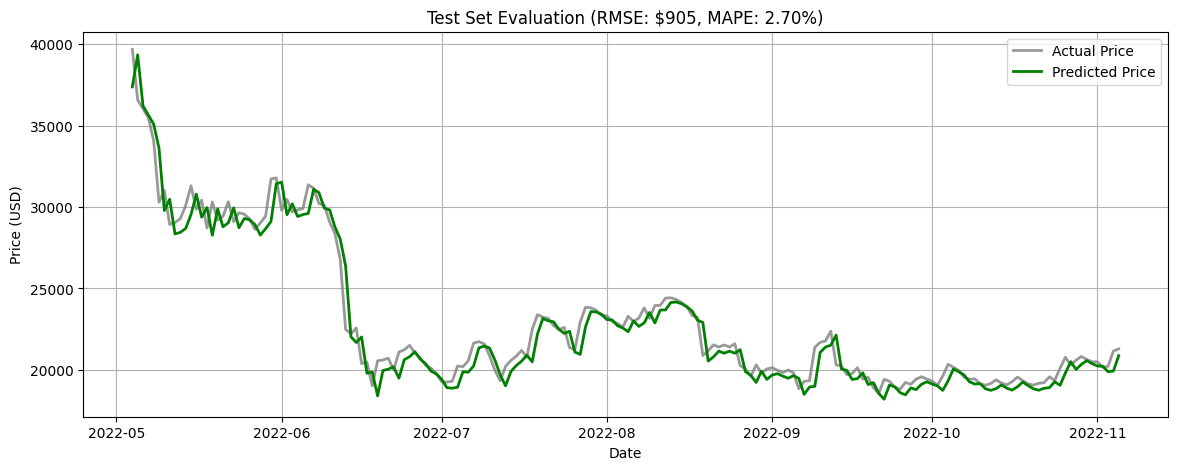

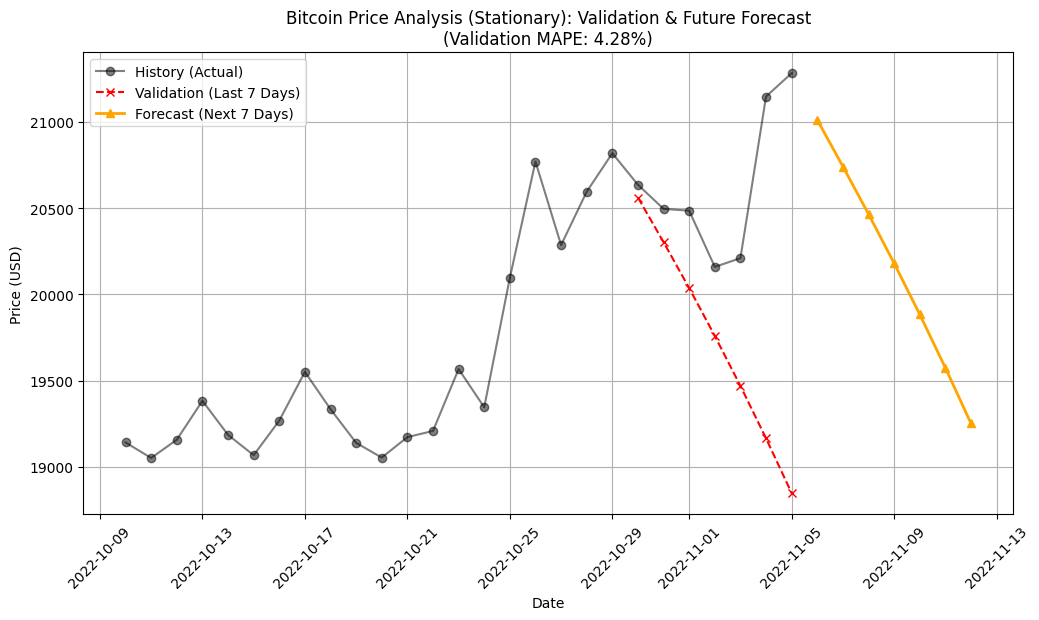

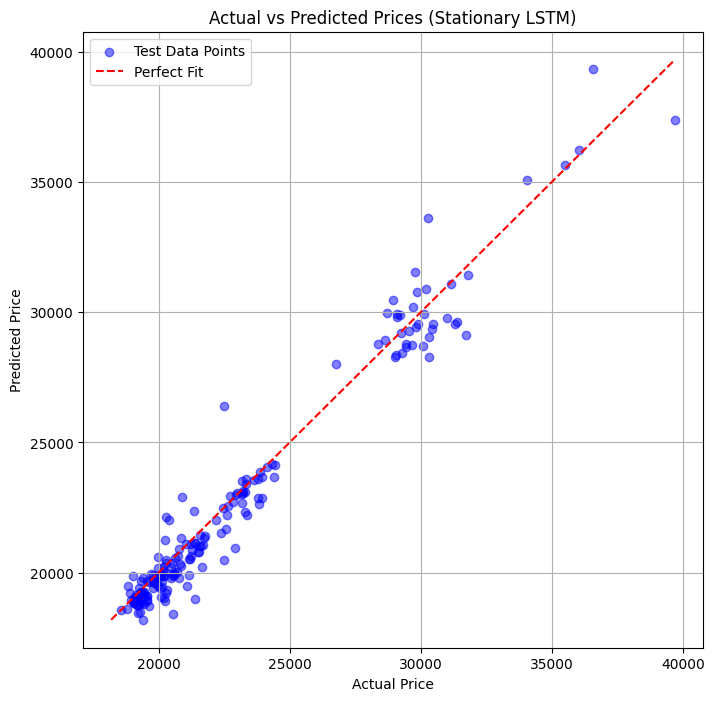


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20561.50  | -0.36%
2022-10-31 | $20495.77  | $20302.75  | -0.94%
2022-11-01 | $20485.27  | $20036.51  | -2.19%
2022-11-02 | $20159.50  | $19759.29  | -1.99%
2022-11-03 | $20209.99  | $19469.13  | -3.67%
2022-11-04 | $21147.23  | $19165.23  | -9.37%
2022-11-05 | $21282.69  | $18847.48  | -11.44%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21011.67 
2022-11-07 | $20741.34 
2022-11-08 | $20465.55 
2022-11-09 | $20180.39 
2022-11-10 | $19883.60 
2022-11-11 | $19574.08 
2022-11-12 | $19251.52 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

coin_df['Prev_Close'] = coin_df['Close'].shift(1)
coin_df['Diff'] = coin_df['Close'] - coin_df['Prev_Close']
coin_df = coin_df.dropna().reset_index(drop=True)

data_diff = coin_df[['Diff']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_diff = scaler.fit_transform(data_diff)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_diff)):
    X.append(scaled_diff[i-look_back:i, 0])
    y.append(scaled_diff[i, 0])

X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training LSTM model on Price Changes...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_pred_diff = model.predict(X_train)
test_pred_diff = model.predict(X_test)

train_pred_diff = scaler.inverse_transform(train_pred_diff)
test_pred_diff = scaler.inverse_transform(test_pred_diff)

train_prev_close = coin_df['Prev_Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
test_prev_close = coin_df['Prev_Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_pred_price = train_prev_close + train_pred_diff
test_pred_price = test_prev_close + test_pred_diff

y_train_actual = coin_df['Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
y_test_actual = coin_df['Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Reconstructed) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_diff) - days_to_predict

current_batch = scaled_diff[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back, 1)

current_price = coin_df['Close'].iloc[test_start_index - 1]

recursive_prices = []

for i in range(days_to_predict):
    pred_diff_scaled = model.predict(current_batch, verbose=0)[0]

    current_batch = np.append(current_batch[:, 1:, :], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([pred_diff_scaled])[0][0]

    current_price = current_price + pred_diff
    recursive_prices.append(current_price)

actual_last_7 = coin_df['Close'].iloc[-days_to_predict:].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_diffs = scaled_diff[-look_back:]
curr_batch_future = last_60_diffs.reshape(1, look_back, 1)
current_price_future = coin_df['Close'].iloc[-1]

future_predictions = []

for i in range(7):
    pred_diff_scaled = model.predict(curr_batch_future, verbose=0)[0]
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([pred_diff_scaled])[0][0]
    current_price_future = current_price_future + pred_diff
    future_predictions.append(current_price_future)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_actual, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_pred_price, color='purple', label='Training Data (Predicted)', alpha=0.8)
plt.plot(test_dates, y_test_actual, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_pred_price, color='green', label='Test Data (Predicted)', alpha=0.8)
plt.title('Bitcoin Price Prediction (LSTM - Stationary): Training vs Test')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(test_dates, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_dates, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (RMSE: ${test_rmse:.0f}, MAPE: {test_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = coin_df['Close'].iloc[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Stationary): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, test_pred_price, alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Stationary LSTM)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
min_val = min(np.min(y_test_actual), np.min(test_pred_price))
max_val = max(np.max(y_test_actual), np.max(test_pred_price))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

LSTM with all top 5 corrected on data set

Loading and analyzing data...
Top 5 Correlated Coins Selected: ['nexo', 'hbar', 'stx', 'ltc', 'ksm']
Correlation Coefficients:
Coin
nexo    0.931971
hbar    0.907350
stx     0.903641
ltc     0.897394
ksm     0.895157
dtype: float64
Training Data Range: 2020-02-20 to 2022-11-05
Total Data Points: 990
Training Multivariate LSTM on Raw Prices...
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1106
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073
Ep

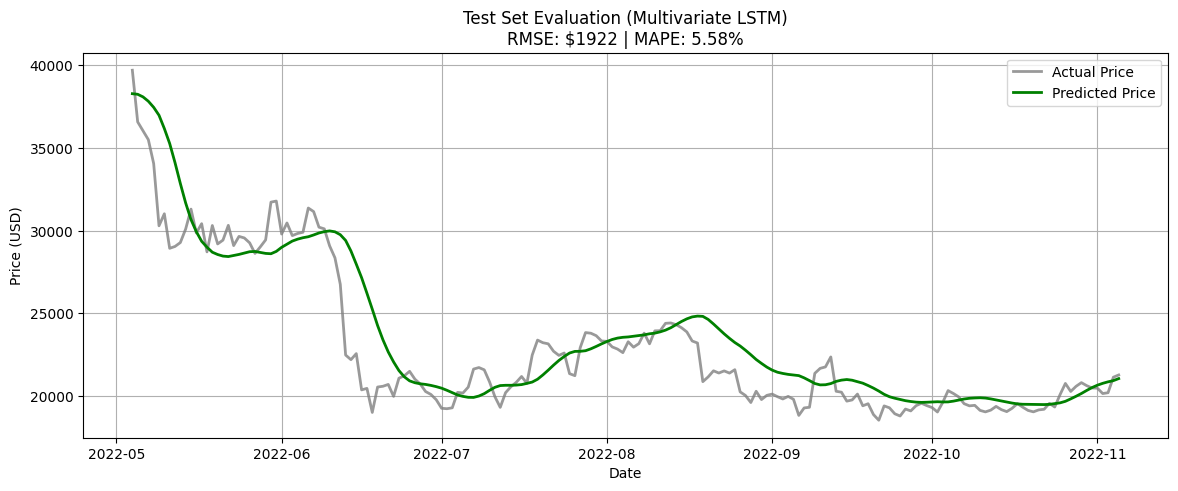

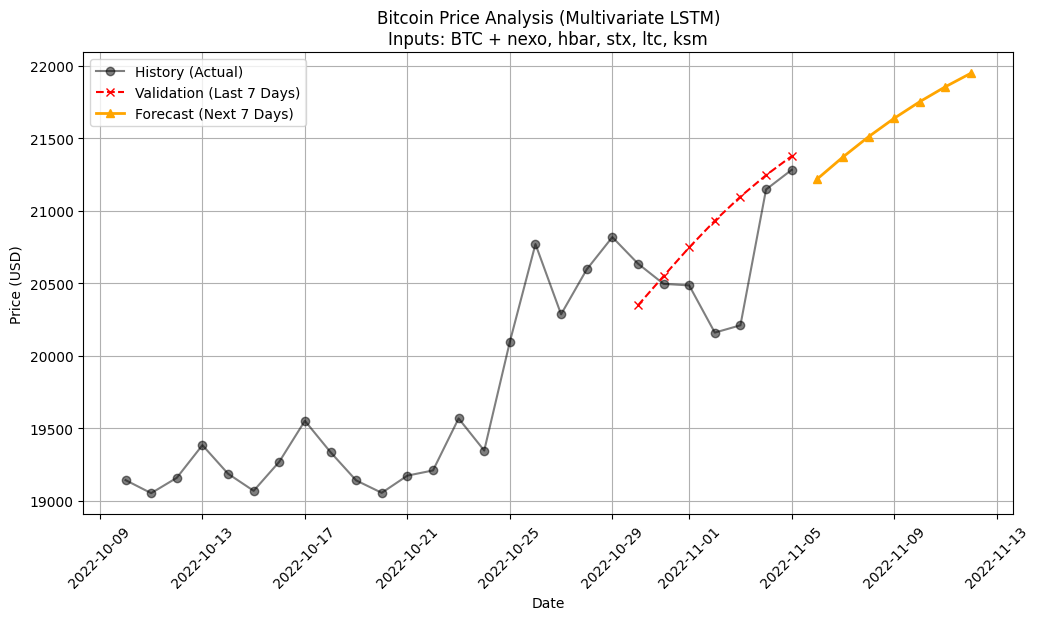


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20347.72  | -1.40%
2022-10-31 | $20495.77  | $20549.36  | +0.26%
2022-11-01 | $20485.27  | $20747.33  | +1.28%
2022-11-02 | $20159.50  | $20931.52  | +3.83%
2022-11-03 | $20209.99  | $21097.88  | +4.39%
2022-11-04 | $21147.23  | $21245.97  | +0.47%
2022-11-05 | $21282.69  | $21377.31  | +0.44%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21220.07 
2022-11-07 | $21370.94 
2022-11-08 | $21511.06 
2022-11-09 | $21638.38 
2022-11-10 | $21753.02 
2022-11-11 | $21856.27 
2022-11-12 | $21949.98 


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Loading and analyzing data...")
df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')
df['Date'] = pd.to_datetime(df['Date'])


wide_df = df.pivot_table(index='Date', columns='Coin', values='Close')
wide_df = wide_df.ffill()

blacklist = ['usdt', 'usdc', 'busd', 'dai', 'tusd', 'usdp', 'wbtc', 'btcb', 'btc']

correlations = wide_df.corrwith(wide_df['btc']).abs().sort_values(ascending=False)

top_5_coins = []
for coin in correlations.index:
    if coin.lower() not in blacklist:
        top_5_coins.append(coin)
        if len(top_5_coins) == 5:
            break

print(f"Top 5 Correlated Coins Selected: {top_5_coins}")
print(f"Correlation Coefficients:\n{correlations[top_5_coins]}")

selected_features = ['btc'] + top_5_coins
final_df = wide_df[selected_features].copy()
final_df = final_df.dropna()

print(f"Training Data Range: {final_df.index.min().date()} to {final_df.index.max().date()}")
print(f"Total Data Points: {len(final_df)}")

btc_prices = final_df['btc']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df.values)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

n_features = X.shape[2]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=n_features))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Multivariate LSTM on Raw Prices...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_pred_scaled = model.predict(X_train)
test_pred_scaled = model.predict(X_test)

train_pred_prices_all = scaler.inverse_transform(train_pred_scaled)
test_pred_prices_all = scaler.inverse_transform(test_pred_scaled)

train_pred_price = train_pred_prices_all[:, 0]
test_pred_price = test_pred_prices_all[:, 0]

train_indices = final_df.index[look_back : look_back + train_size]
test_indices = final_df.index[look_back + train_size : look_back + train_size + len(X_test)]

y_train_actual = btc_prices.loc[train_indices].values
y_test_actual = btc_prices.loc[test_indices].values

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Multivariate - Raw) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_idx_int = len(scaled_data) - days_to_predict

current_batch = scaled_data[test_start_idx_int - look_back : test_start_idx_int]
current_batch = current_batch.reshape(1, look_back, n_features)

recursive_btc_prices = []

for i in range(days_to_predict):
    pred_vector_scaled = model.predict(current_batch, verbose=0)[0]

    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    current_batch = np.append(current_batch[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    recursive_btc_prices.append(pred_vector_price[0])

last_7_indices = final_df.index[-days_to_predict:]
actual_last_7 = btc_prices.loc[last_7_indices].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_btc_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_btc_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_scaled = scaled_data[-look_back:]
curr_batch_future = last_60_days_scaled.reshape(1, look_back, n_features)

future_predictions = []

for i in range(7):
    pred_vector_scaled = model.predict(curr_batch_future, verbose=0)[0]
    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    future_predictions.append(pred_vector_price[0])

last_date = btc_prices.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

plt.figure(figsize=(14, 5))
plt.plot(test_indices, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_indices, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (Multivariate LSTM)\nRMSE: ${test_rmse:.0f} | MAPE: {test_mape:.2f}%')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = last_7_indices
history_dates = btc_prices.index[-(days_to_predict + 20):]
history_vals = btc_prices.values[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_vals, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_btc_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Multivariate LSTM)\nInputs: BTC + {", ".join(top_5_coins)}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_btc_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

Bi-LSTM top 5  corr

Loading and analyzing data...
Top 5 Correlated Coins Selected: ['nexo', 'hbar', 'stx', 'ltc', 'ksm']
Correlation Coefficients:
Coin
nexo    0.931971
hbar    0.907350
stx     0.903641
ltc     0.897394
ksm     0.895157
dtype: float64
Training Data Range: 2020-02-20 to 2022-11-05
Training Multivariate Bi-LSTM on Raw Prices...
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0924
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059
Epoch 11/25
24

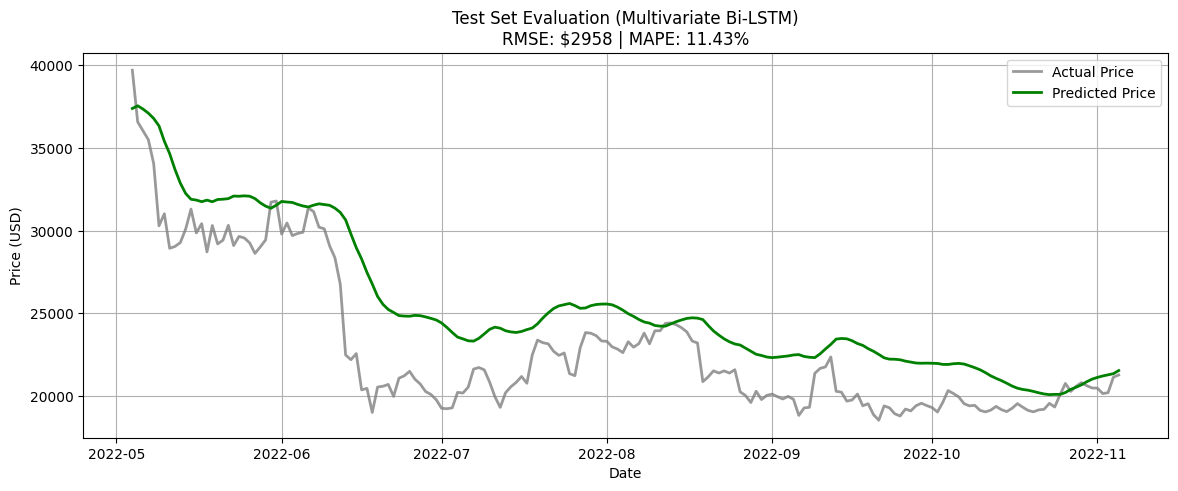

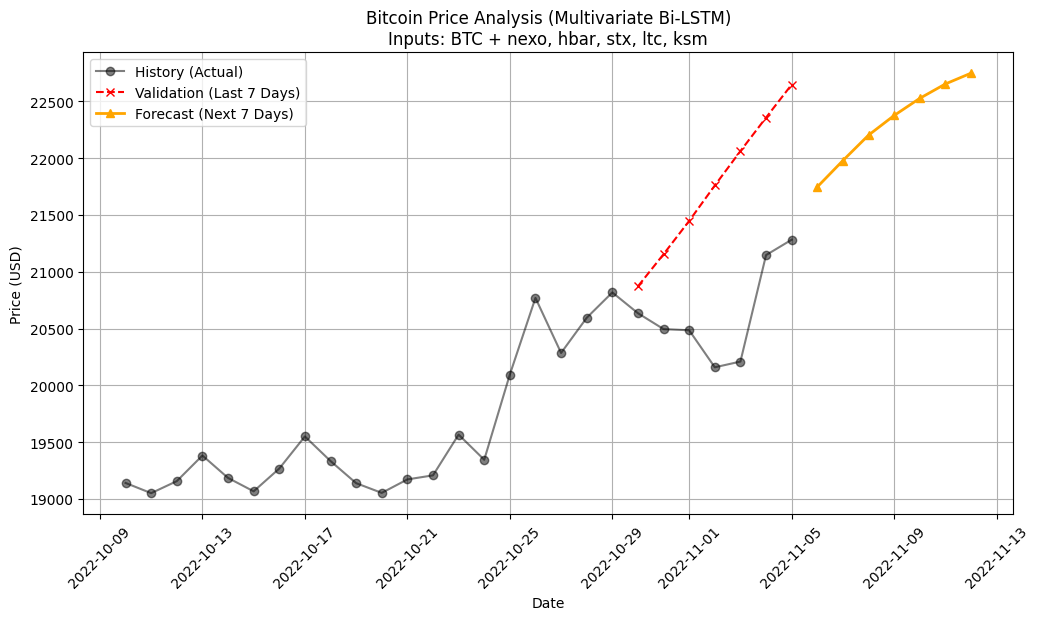


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20872.54  | +1.15%
2022-10-31 | $20495.77  | $21155.32  | +3.22%
2022-11-01 | $20485.27  | $21448.50  | +4.70%
2022-11-02 | $20159.50  | $21759.94  | +7.94%
2022-11-03 | $20209.99  | $22062.89  | +9.17%
2022-11-04 | $21147.23  | $22357.79  | +5.72%
2022-11-05 | $21282.69  | $22648.27  | +6.42%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21747.25 
2022-11-07 | $21979.42 
2022-11-08 | $22203.09 
2022-11-09 | $22376.32 
2022-11-10 | $22527.21 
2022-11-11 | $22653.80 
2022-11-12 | $22748.84 


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Loading and analyzing data...")
df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')
df['Date'] = pd.to_datetime(df['Date'])


wide_df = df.pivot_table(index='Date', columns='Coin', values='Close')
wide_df = wide_df.ffill()

blacklist = ['usdt', 'usdc', 'busd', 'dai', 'tusd', 'usdp', 'wbtc', 'btcb', 'btc']

correlations = wide_df.corrwith(wide_df['btc']).abs().sort_values(ascending=False)

top_5_coins = []
for coin in correlations.index:
    if coin.lower() not in blacklist:
        top_5_coins.append(coin)
        if len(top_5_coins) == 5:
            break

print(f"Top 5 Correlated Coins Selected: {top_5_coins}")
print(f"Correlation Coefficients:\n{correlations[top_5_coins]}")

selected_features = ['btc'] + top_5_coins
final_df = wide_df[selected_features].copy()
final_df = final_df.dropna()

print(f"Training Data Range: {final_df.index.min().date()} to {final_df.index.max().date()}")

btc_prices = final_df['btc']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df.values)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

n_features = X.shape[2]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=n_features))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Multivariate Bi-LSTM on Raw Prices...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_pred_scaled = model.predict(X_train)
test_pred_scaled = model.predict(X_test)

train_pred_prices_all = scaler.inverse_transform(train_pred_scaled)
test_pred_prices_all = scaler.inverse_transform(test_pred_scaled)

train_pred_price = train_pred_prices_all[:, 0]
test_pred_price = test_pred_prices_all[:, 0]

train_indices = final_df.index[look_back : look_back + train_size]
test_indices = final_df.index[look_back + train_size : look_back + train_size + len(X_test)]

y_train_actual = btc_prices.loc[train_indices].values
y_test_actual = btc_prices.loc[test_indices].values

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Multivariate Bi-LSTM) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_idx_int = len(scaled_data) - days_to_predict

current_batch = scaled_data[test_start_idx_int - look_back : test_start_idx_int]
current_batch = current_batch.reshape(1, look_back, n_features)

recursive_btc_prices = []

for i in range(days_to_predict):
    pred_vector_scaled = model.predict(current_batch, verbose=0)[0]

    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    current_batch = np.append(current_batch[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    recursive_btc_prices.append(pred_vector_price[0])

last_7_indices = final_df.index[-days_to_predict:]
actual_last_7 = btc_prices.loc[last_7_indices].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_btc_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_btc_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_scaled = scaled_data[-look_back:]
curr_batch_future = last_60_days_scaled.reshape(1, look_back, n_features)

future_predictions = []

for i in range(7):
    pred_vector_scaled = model.predict(curr_batch_future, verbose=0)[0]

    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    future_predictions.append(pred_vector_price[0])

last_date = btc_prices.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

plt.figure(figsize=(14, 5))
plt.plot(test_indices, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_indices, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (Multivariate Bi-LSTM)\nRMSE: ${test_rmse:.0f} | MAPE: {test_mape:.2f}%')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = last_7_indices
history_dates = btc_prices.index[-(days_to_predict + 20):]
history_vals = btc_prices.values[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_vals, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_btc_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Multivariate Bi-LSTM)\nInputs: BTC + {", ".join(top_5_coins)}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_btc_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

Bi-lstm corr>0.5

Loading and analyzing data...
Selected Coins (Correlation > 0.8): ['nexo', 'hbar', 'stx', 'ltc', 'ksm', 'miota', 'algo', 'eth', 'ftt', 'xmr', 'enj', 'xlm', 'bat', 'zec', 'link', 'rune', 'mkr', 'ada', 'rvn', 'qtum', 'vet', 'theta', 'dcr', 'bnb', 'xrp', 'bnt', 'atom', 'chz', 'hot', 'trx', 'omg', 'tfuel', 'celr', 'waves']
Correlation Coefficients:
Coin
nexo     0.931971
hbar     0.907350
stx      0.903641
ltc      0.897394
ksm      0.895157
miota    0.890957
algo     0.889448
eth      0.887984
ftt      0.884781
xmr      0.879380
enj      0.877837
xlm      0.877004
bat      0.873523
zec      0.864767
link     0.861411
rune     0.857528
mkr      0.854924
ada      0.852824
rvn      0.849792
qtum     0.848067
vet      0.843267
theta    0.842790
dcr      0.842408
bnb      0.842242
xrp      0.839786
bnt      0.839556
atom     0.839123
chz      0.833864
hot      0.826084
trx      0.821697
omg      0.814650
tfuel    0.806214
celr     0.804831
waves    0.804126
dtype: float64
Training Data Range: 

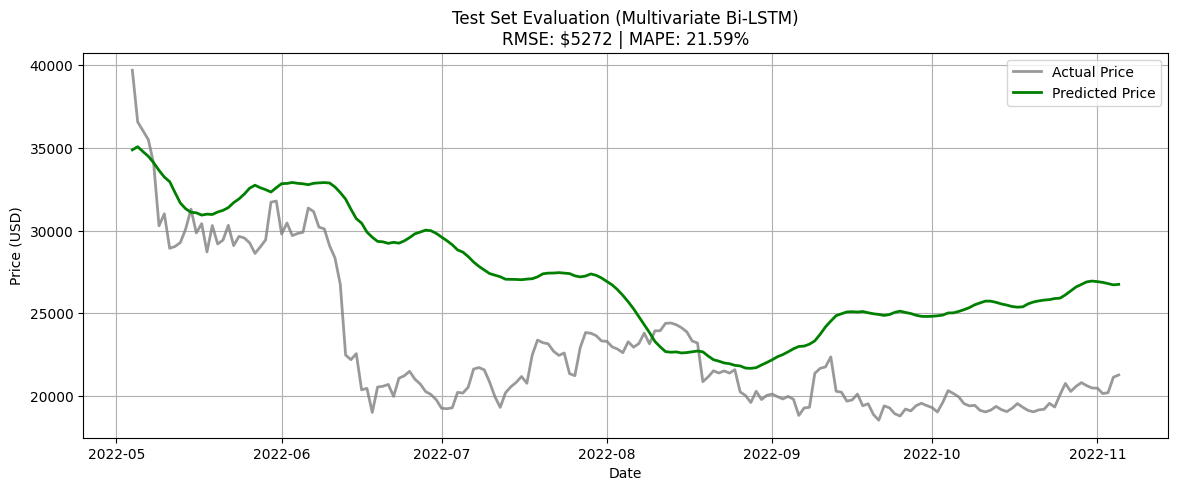

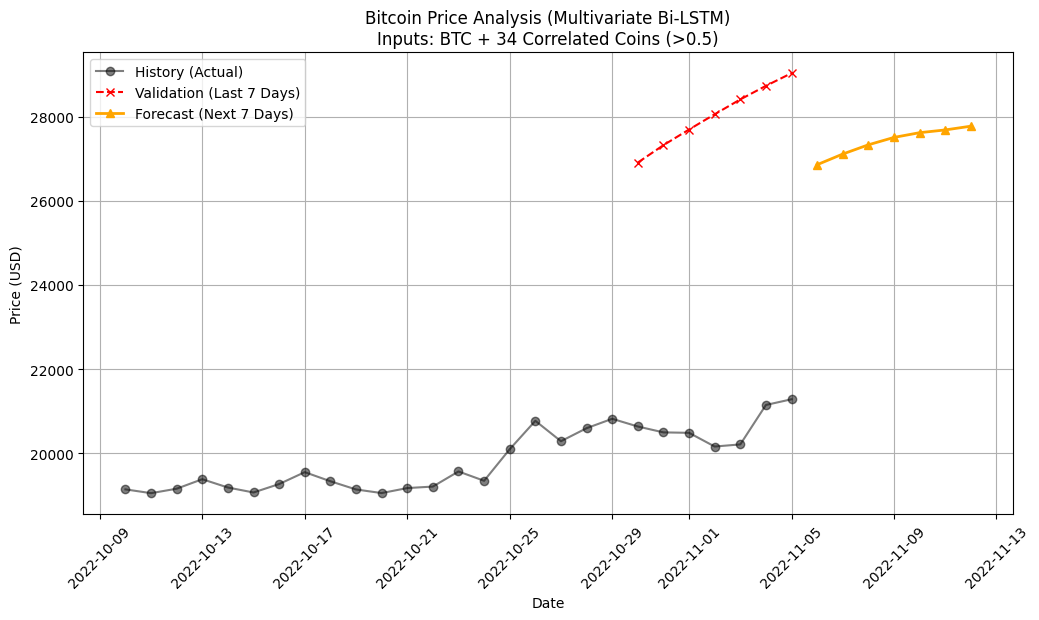


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $26907.81  | +30.40%
2022-10-31 | $20495.77  | $27321.04  | +33.30%
2022-11-01 | $20485.27  | $27692.70  | +35.18%
2022-11-02 | $20159.50  | $28055.00  | +39.17%
2022-11-03 | $20209.99  | $28407.98  | +40.56%
2022-11-04 | $21147.23  | $28730.56  | +35.86%
2022-11-05 | $21282.69  | $29031.79  | +36.41%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $26856.76 
2022-11-07 | $27110.11 
2022-11-08 | $27329.57 
2022-11-09 | $27505.39 
2022-11-10 | $27617.79 
2022-11-11 | $27682.76 
2022-11-12 | $27772.17 


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Loading and analyzing data...")
df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')
df['Date'] = pd.to_datetime(df['Date'])


wide_df = df.pivot_table(index='Date', columns='Coin', values='Close')
wide_df = wide_df.ffill()

blacklist = ['usdt', 'usdc', 'busd', 'dai', 'tusd', 'usdp', 'wbtc', 'btcb', 'btc']

correlations = wide_df.corrwith(wide_df['btc']).abs().sort_values(ascending=False)

selected_coins = []
for coin in correlations.index:
    if coin.lower() not in blacklist and correlations[coin] > 0.8:
        selected_coins.append(coin)

print(f"Selected Coins (Correlation > 0.8): {selected_coins}")
print(f"Correlation Coefficients:\n{correlations[selected_coins]}")

selected_features = ['btc'] + selected_coins
final_df = wide_df[selected_features].copy()
final_df = final_df.dropna()

print(f"Training Data Range: {final_df.index.min().date()} to {final_df.index.max().date()}")

btc_prices = final_df['btc']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df.values)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

n_features = X.shape[2]
print(f"Input features per time step: {n_features}")

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=n_features))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training Multivariate Bi-LSTM on Raw Prices...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_pred_scaled = model.predict(X_train)
test_pred_scaled = model.predict(X_test)

train_pred_prices_all = scaler.inverse_transform(train_pred_scaled)
test_pred_prices_all = scaler.inverse_transform(test_pred_scaled)

train_pred_price = train_pred_prices_all[:, 0]
test_pred_price = test_pred_prices_all[:, 0]

train_indices = final_df.index[look_back : look_back + train_size]
test_indices = final_df.index[look_back + train_size : look_back + train_size + len(X_test)]

y_train_actual = btc_prices.loc[train_indices].values
y_test_actual = btc_prices.loc[test_indices].values

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Multivariate Bi-LSTM) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_idx_int = len(scaled_data) - days_to_predict

current_batch = scaled_data[test_start_idx_int - look_back : test_start_idx_int]
current_batch = current_batch.reshape(1, look_back, n_features)

recursive_btc_prices = []

for i in range(days_to_predict):
    pred_vector_scaled = model.predict(current_batch, verbose=0)[0]

    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    current_batch = np.append(current_batch[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    recursive_btc_prices.append(pred_vector_price[0])

last_7_indices = final_df.index[-days_to_predict:]
actual_last_7 = btc_prices.loc[last_7_indices].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_btc_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_btc_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_days_scaled = scaled_data[-look_back:]
curr_batch_future = last_60_days_scaled.reshape(1, look_back, n_features)

future_predictions = []

for i in range(7):
    pred_vector_scaled = model.predict(curr_batch_future, verbose=0)[0]

    next_input = pred_vector_scaled.reshape(1, 1, n_features)
    curr_batch_future = np.append(curr_batch_future[:, 1:, :], next_input, axis=1)

    pred_vector_price = scaler.inverse_transform([pred_vector_scaled])[0]
    future_predictions.append(pred_vector_price[0])

last_date = btc_prices.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

plt.figure(figsize=(14, 5))
plt.plot(test_indices, y_test_actual, color='gray', label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_indices, test_pred_price, color='green', label='Predicted Price', linewidth=2)
plt.title(f'Test Set Evaluation (Multivariate Bi-LSTM)\nRMSE: ${test_rmse:.0f} | MAPE: {test_mape:.2f}%')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = last_7_indices
history_dates = btc_prices.index[-(days_to_predict + 20):]
history_vals = btc_prices.values[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_vals, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_btc_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Multivariate Bi-LSTM)\nInputs: BTC + {len(selected_coins)} Correlated Coins (>0.5)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_btc_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")

GRU differences

Training GRU model on Price Differences...
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0726
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116
Epoch 15/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

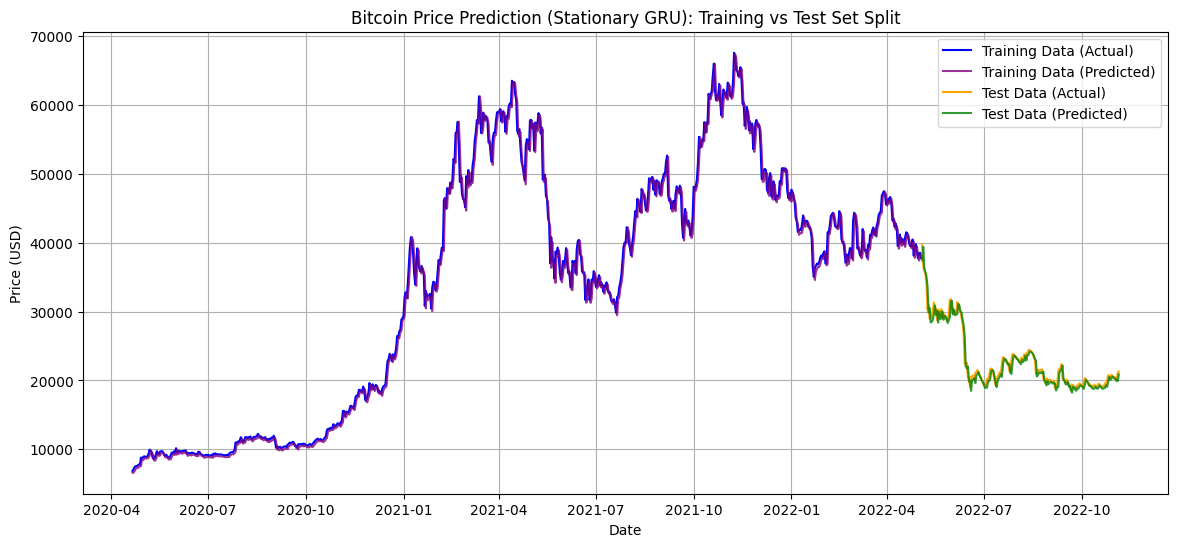

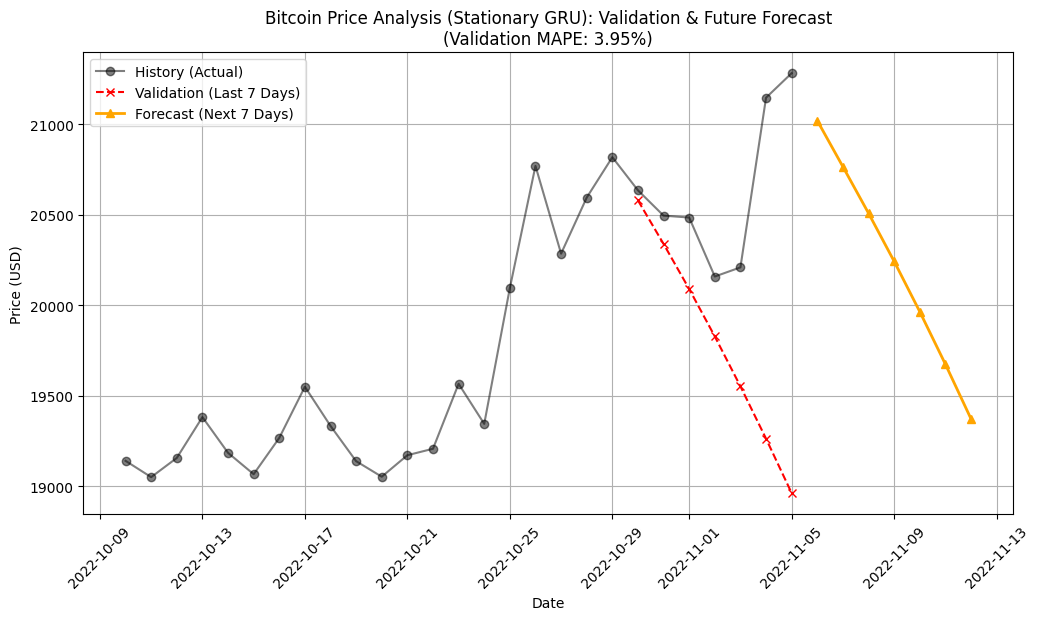

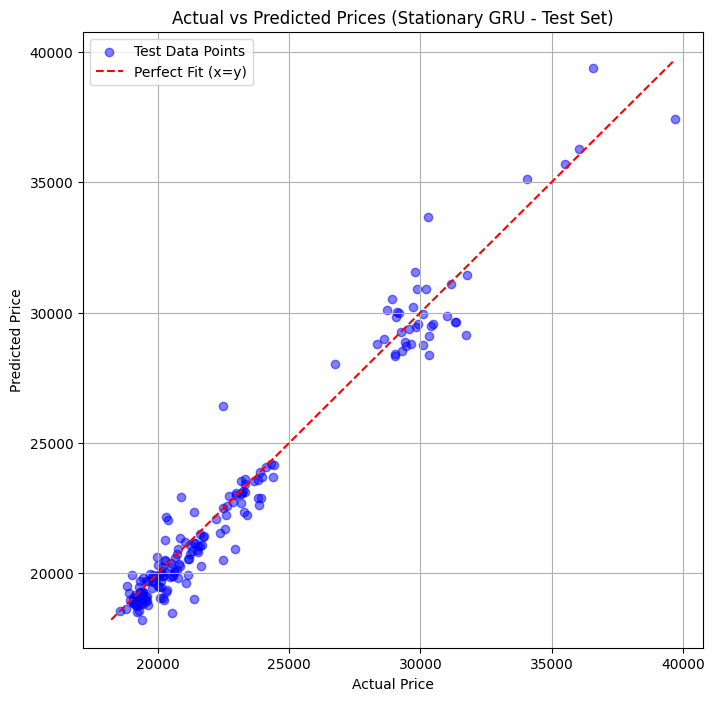


Last 7 Days Comparison (Validation):
Date         | Actual     | Predicted  | Diff %  
--------------------------------------------------
2022-10-30 | $20635.60  | $20580.01  | -0.27%
2022-10-31 | $20495.77  | $20339.46  | -0.76%
2022-11-01 | $20485.27  | $20090.32  | -1.93%
2022-11-02 | $20159.50  | $19828.57  | -1.64%
2022-11-03 | $20209.99  | $19552.94  | -3.25%
2022-11-04 | $21147.23  | $19263.92  | -8.91%
2022-11-05 | $21282.69  | $18962.89  | -10.90%

Next 7 Days Forecast (Future):
Date         | Forecast  
------------------------------
2022-11-06 | $21020.53 
2022-11-07 | $20765.99 
2022-11-08 | $20509.15 
2022-11-09 | $20243.29 
2022-11-10 | $19965.45 
2022-11-11 | $19675.19 
2022-11-12 | $19373.37 


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf
import random
import os

seed_value = 123
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

df = pd.read_csv('/content/drive/MyDrive/Cos 801 data/coinmarketcap.csv')

df['Date'] = pd.to_datetime(df['Date'])
coin_df = df[df['Coin'] == 'btc'].copy()
coin_df = coin_df.sort_values('Date', ascending=True).reset_index(drop=True)

coin_df['Prev_Close'] = coin_df['Close'].shift(1)
coin_df['Diff'] = coin_df['Close'] - coin_df['Prev_Close']
coin_df = coin_df.dropna().reset_index(drop=True)

data_diff = coin_df[['Diff']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_diff = scaler.fit_transform(data_diff)

look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_diff)):
    X.append(scaled_diff[i-look_back:i, 0])
    y.append(scaled_diff[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Training GRU model on Price Differences...")
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)


train_pred_scaled = model.predict(X_train)
test_pred_scaled = model.predict(X_test)

train_pred_diff = scaler.inverse_transform(train_pred_scaled)
test_pred_diff = scaler.inverse_transform(test_pred_scaled)

train_prev_close = coin_df['Prev_Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
test_prev_close = coin_df['Prev_Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_pred_price = train_prev_close + train_pred_diff
test_pred_price = test_prev_close + test_pred_diff

y_train_actual = coin_df['Close'].iloc[look_back : look_back + train_size].values.reshape(-1, 1)
y_test_actual = coin_df['Close'].iloc[look_back + train_size : look_back + train_size + len(X_test)].values.reshape(-1, 1)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_price))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_price))
train_mape = mean_absolute_percentage_error(y_train_actual, train_pred_price) * 100
test_mape = mean_absolute_percentage_error(y_test_actual, test_pred_price) * 100

print(f"\n--- General Model Performance (Stationary GRU) ---")
print(f"Train RMSE: ${train_rmse:.2f} | Train MAPE: {train_mape:.2f}%")
print(f"Test RMSE:  ${test_rmse:.2f}  | Test MAPE:  {test_mape:.2f}%")

print("\n--- Validating Last 7 Days (Recursive Forecast) ---")

days_to_predict = 7
test_start_index = len(scaled_diff) - days_to_predict

current_batch = scaled_diff[test_start_index - look_back : test_start_index]
current_batch = current_batch.reshape(1, look_back, 1)

current_price = coin_df['Close'].iloc[test_start_index - 1]

recursive_prices = []

for i in range(days_to_predict):
    pred_diff_scaled = model.predict(current_batch, verbose=0)[0]

    current_batch = np.append(current_batch[:, 1:, :], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([pred_diff_scaled])[0][0]

    current_price = current_price + pred_diff
    recursive_prices.append(current_price)

actual_last_7 = coin_df['Close'].iloc[-days_to_predict:].values

last_7_rmse = np.sqrt(mean_squared_error(actual_last_7, recursive_prices))
last_7_mape = mean_absolute_percentage_error(actual_last_7, recursive_prices) * 100

print(f"Last 7 Days RMSE: ${last_7_rmse:.2f}")
print(f"Last 7 Days MAPE: {last_7_mape:.2f}%")

print("\n--- Forecasting Future 7 Days ---")

last_60_diffs = scaled_diff[-look_back:]
curr_batch_future = last_60_diffs.reshape(1, look_back, 1)
current_price_future = coin_df['Close'].iloc[-1]

future_predictions = []

for i in range(7):
    pred_diff_scaled = model.predict(curr_batch_future, verbose=0)[0]

    curr_batch_future = np.append(curr_batch_future[:, 1:, :], [[pred_diff_scaled]], axis=1)

    pred_diff = scaler.inverse_transform([pred_diff_scaled])[0][0]
    current_price_future = current_price_future + pred_diff
    future_predictions.append(current_price_future)

last_date = coin_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

date_series = coin_df['Date'].reset_index(drop=True)
train_dates = date_series[look_back : look_back + train_size]
test_dates = date_series[look_back + train_size : look_back + train_size + len(X_test)]

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_actual, color='blue', label='Training Data (Actual)')
plt.plot(train_dates, train_pred_price, color='purple', label='Training Data (Predicted)', alpha=0.8)
plt.plot(test_dates, y_test_actual, color='orange', label='Test Data (Actual)')
plt.plot(test_dates, test_pred_price, color='green', label='Test Data (Predicted)', alpha=0.8)
plt.title('Bitcoin Price Prediction (Stationary GRU): Training vs Test Set Split')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_7_dates = coin_df['Date'].iloc[-days_to_predict:]
history_dates = coin_df['Date'].iloc[-(days_to_predict + 20):]
history_prices = coin_df['Close'].iloc[-(days_to_predict + 20):]

plt.figure(figsize=(12, 6))
plt.plot(history_dates, history_prices, marker='o', color='black', alpha=0.5, label='History (Actual)')
plt.plot(last_7_dates, recursive_prices, marker='x', linestyle='--', color='red', label='Validation (Last 7 Days)')
plt.plot(future_dates, future_predictions, marker='^', linestyle='-', color='orange', linewidth=2, label='Forecast (Next 7 Days)')
plt.title(f'Bitcoin Price Analysis (Stationary GRU): Validation & Future Forecast\n(Validation MAPE: {last_7_mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, test_pred_price, alpha=0.5, color='blue', label='Test Data Points')
plt.title('Actual vs Predicted Prices (Stationary GRU - Test Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
min_val = min(np.min(y_test_actual), np.min(test_pred_price))
max_val = max(np.max(y_test_actual), np.max(test_pred_price))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (x=y)')
plt.legend()
plt.grid(True)
plt.show()

print("\nLast 7 Days Comparison (Validation):")
print(f"{'Date':<12} | {'Actual':<10} | {'Predicted':<10} | {'Diff %':<8}")
print("-" * 50)
for date, act, pred in zip(last_7_dates, actual_last_7, recursive_prices):
    diff = ((pred - act) / act) * 100
    print(f"{date.date()} | ${act:<9.2f} | ${pred:<9.2f} | {diff:+.2f}%")

print("\nNext 7 Days Forecast (Future):")
print(f"{'Date':<12} | {'Forecast':<10}")
print("-" * 30)
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} | ${pred:<9.2f}")